# Problem Context

**Background and Context**

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, it was difficult to identify the potential customers because customers were contacted at random without looking at the available information.


The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

This time company wants to harness the available data of existing and potential customers to target the right customers.

You as a Data Scientist at "Visit with us" travel company has to analyze the customers' data and information to provide recommendations to the Policy Maker and build a model to predict the potential customer who is going to purchase the newly introduced travel package. The model will be built to make predictions before a customer is contacted.



# Problem Statement

**Objective**

To predict which customer is more likely to purchase the newly introduced travel package.



# Data Description

**Customer details:**

CustomerID: Unique customer ID

ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)

Age: Age of customer

TypeofContact: How customer was contacted (Company Invited or Self Inquiry)

CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.

Occupation: Occupation of customer

Gender: Gender of customer

NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer

PreferredPropertyStar: Preferred hotel property rating by customer

MaritalStatus: Marital status of customer

NumberOfTrips: Average number of trips in a year by customer

Passport: The customer has a passport or not (0: No, 1: Yes)

OwnCar: Whether the customers own a car or not (0: No, 1: Yes)

NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer

Designation: Designation of the customer in the current organization

MonthlyIncome: Gross monthly income of the customer

**Customer interaction data**: 

PitchSatisfactionScore: Sales pitch satisfaction score

ProductPitched: Product pitched by the salesperson

NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch

DurationOfPitch: Duration of the pitch by a salesperson to the customer

# Assumptions


1.   We will assume that the Product Pitched (to the Customer) is the same as the Product that has been purchased.
2.   Since the company wants to harness the available data of existing and potential customers to target the right customers, we will not be using the 'Customer Interaction Data' for model predictions as this data will not be available in the case of a new customer. 



# Importing the libraries required

In [1]:
##Connect to Google drive to read and write to files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

#Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Command to tell python to actually display the graphs
%matplotlib inline

# To split the data into train and test
from sklearn.model_selection import train_test_split

# Supress warnings
import warnings
warnings.filterwarnings('ignore') 

# To build models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)



# Loading the dataset

In [3]:
#The Excel spreadsheet has 2 tabs. One tab holds the data dictionary and the other holds the dataset. Importing only the dataset.
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Tourism.xlsx", sheet_name='Tourism')

# Overview of the dataset

**Understand the shape of the dataset**

In [4]:
data.shape

(4888, 20)

The dataset consists of 4,888 rows and 20 columns

**View the first and last 5 rows of the dataset**

In [5]:
data.head(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [6]:
data.tail(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


**Check the data types of the columns for the dataset**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

Quite a few columns seem to have null/missing values. 6 out of 20 columns are of object/string type where the rest are all numerical. ProdTaken is the dependent variable. The memory usage is at 763KB.

**We have 4 columns that fall under Customer Interaction data - PitchSatisfactionScore, ProductPitched, NumberOfFollowups and DurationOfPitch. Since we will not have this data for new customers, we are not going to use these columns to train our models.**

In [8]:
#Check to see if the CustomerID column is merely an index column with unique values
data['CustomerID'].nunique()

4888

**The CustomerID column has all unique values. It will not add any predictive power to the machine learning model, and can hence be dropped.**

In [9]:
data.drop('CustomerID', axis=1, inplace=True)

In [10]:
#Confirm that we are now left with 19 columns
data.shape

(4888, 19)

**Duplicates - Now that we have dropped the column with all unique values, lets check the dataset for duplicate rows**

In [11]:
data.duplicated().sum()

141

In [12]:
#Let's inspect the duplicate rows to determine if they are legit or if they could be dropped
duplicated = data[data.duplicated(keep=False)] # keep=False is to retain the duplicated rows - if we do not supply keep=False, we only get 141 rows vs 282
duplicated.shape


(282, 19)

In [13]:
duplicated.head(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
44,0,NaN,Company Invited,1,6.0,Small Business,Female,2,3.0,Deluxe,3.0,Single,2.0,0,3,1,0.0,Manager,NaN
48,0,46.0,Company Invited,3,11.0,Small Business,Male,3,3.0,Deluxe,3.0,Single,5.0,1,5,1,1.0,Manager,20772.0
61,0,38.0,Company Invited,1,35.0,Salaried,Female,2,3.0,Deluxe,3.0,Single,2.0,0,3,1,0.0,Manager,17406.0
62,0,50.0,Self Enquiry,1,13.0,Small Business,Female,2,4.0,King,3.0,Married,6.0,1,4,1,1.0,VP,33740.0
66,0,36.0,Company Invited,1,17.0,Salaried,Male,3,4.0,Deluxe,4.0,Unmarried,2.0,0,4,1,1.0,Manager,21499.0


In [14]:
#Let us look at all the observations where Age is 46.
duplicated[duplicated['Age'] == 46.0 ]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
48,0,46.0,Company Invited,3,11.0,Small Business,Male,3,3.0,Deluxe,3.0,Single,5.0,1,5,1,1.0,Manager,20772.0
1518,0,46.0,Company Invited,3,11.0,Small Business,Male,3,3.0,Deluxe,3.0,Single,5.0,1,5,1,1.0,Manager,20772.0
2597,0,46.0,Self Enquiry,1,16.0,Salaried,Male,3,4.0,Deluxe,4.0,Married,2.0,0,4,1,1.0,Manager,21026.0
2618,0,46.0,Self Enquiry,3,11.0,Salaried,Female,2,4.0,Deluxe,5.0,Married,6.0,1,4,0,1.0,Manager,23684.0
2662,0,46.0,Company Invited,3,13.0,Small Business,Fe Male,3,5.0,Standard,3.0,Unmarried,8.0,0,4,1,1.0,Senior Manager,27543.0
4067,0,46.0,Self Enquiry,1,16.0,Salaried,Male,3,4.0,Deluxe,4.0,Married,2.0,0,4,1,1.0,Manager,21026.0
4088,0,46.0,Self Enquiry,3,11.0,Salaried,Female,2,4.0,Deluxe,5.0,Married,6.0,1,4,0,1.0,Manager,23684.0
4132,0,46.0,Company Invited,3,13.0,Small Business,Fe Male,3,5.0,Standard,3.0,Unmarried,8.0,0,4,1,1.0,Senior Manager,27543.0


Income seems to match to the value in the 10's place. The typo in the gender column too seems to match between the 2 rows. Concluding that these are duplicates.

**Let us drop the 141 duplicate rows**

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
#Now that we have dropped the duplicate rows, let us check the shape of the data
data.shape

(4747, 19)

**Listing columns with Null Values**

In [17]:
data.isnull().sum()

ProdTaken                     0
Age                         216
TypeofContact                25
CityTier                      0
DurationOfPitch             246
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            44
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               138
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     60
Designation                   0
MonthlyIncome               224
dtype: int64

DurationofPitch, MonthlyIncome, and Age columns seem to have the most number of missing values in upwards of 200+, approximately 5%.

NumberOfTrips, NumberOfFollowups, PreferredProprtyStar, TypeOfContact columns too have null values.

NumberOfChildrenVisiting has some null values, but that might mean there were no children in the group - so we should be able to impute the missing entries with 0.


# Statistical summary of the data

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4747.0,0.188329,0.391016,0.0,0.0,0.0,0.0,1.0
Age,4531.0,37.585522,9.328723,18.0,31.0,36.0,44.0,61.0
CityTier,4747.0,1.655151,0.917416,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4501.0,15.510998,8.535634,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisiting,4747.0,2.911734,0.724040,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4703.0,3.705082,1.008677,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4721.0,3.583351,0.800351,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4609.0,3.233239,1.847851,1.0,2.0,3.0,4.0,22.0
Passport,4747.0,0.289657,0.453651,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4747.0,3.051612,1.369584,1.0,2.0,3.0,4.0,5.0


Minimum **Age** of customer is 18 and Maximum age is 61 with mean of 37. 50% of the customers are 36 or below.

Mean **duration of pitch** is 15 minutes to max of 127 minutes. Possibility of **outliers** in this column.

50% of the customers seem to travel in a group of 3 or less.

Mean **Number of trips** is 3 with maximum of 22. A trip a month is still 12 trips total. There might be **outliers** to be handled.

Average Monthly Income of customer is 23602 with maximum of 98678 where as the income is 25,535 at the third quartile. There might be **outliers to be handled**.

Looks like a minority has the **passport**. Let us pay close attention to the passport data during EDA to see if most passport holders purchased a trip. If this is in fact the case, we should perhaps entice the customers with Passport application and renewal servcies. 

**Categorical column statistics**

In [19]:
string_columns =['TypeofContact','Designation','MaritalStatus','Occupation','Gender','ProductPitched']
for col in string_columns:
  print(data[col].value_counts())

Self Enquiry       3350
Company Invited    1372
Name: TypeofContact, dtype: int64
Executive         1800
Manager           1684
Senior Manager     714
AVP                324
VP                 225
Name: Designation, dtype: int64
Married      2279
Divorced      950
Single        875
Unmarried     643
Name: MaritalStatus, dtype: int64
Salaried          2293
Small Business    2028
Large Business     424
Free Lancer          2
Name: Occupation, dtype: int64
Male       2835
Female     1769
Fe Male     143
Name: Gender, dtype: int64
Basic           1800
Deluxe          1684
Standard         714
Super Deluxe     324
King             225
Name: ProductPitched, dtype: int64


There seem to be data discrepancy in the Gender column that will have to be rectified. Also there are only 2 entries with the Occupation as Free Lancer. We could delete these 2 observations as it is too little data to come to any conclusion about Free Lancers.

# Data Cleansing

In [20]:
#Rectifying the data discrepancy in the Gender Column. 
data['Gender'] = data['Gender'].replace('Fe Male', 'Female')


In [21]:
#Verifying that the Gender column has been updated and contains only 2 unique values
data['Gender'].value_counts(1)

Male      0.597219
Female    0.402781
Name: Gender, dtype: float64

# Datatype Conversions

**Converting the data type of the category variables from object/float to category**

In [22]:
category_columns = ['ProdTaken', 'TypeofContact', 'CityTier', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Passport', 'OwnCar', 'Designation']
data[category_columns] = data[category_columns].astype('category')

In [23]:
#Verifying the conversion and also checking the memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4747 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4747 non-null   category
 1   Age                       4531 non-null   float64 
 2   TypeofContact             4722 non-null   category
 3   CityTier                  4747 non-null   category
 4   DurationOfPitch           4501 non-null   float64 
 5   Occupation                4747 non-null   category
 6   Gender                    4747 non-null   category
 7   NumberOfPersonVisiting    4747 non-null   int64   
 8   NumberOfFollowups         4703 non-null   float64 
 9   ProductPitched            4747 non-null   category
 10  PreferredPropertyStar     4721 non-null   float64 
 11  MaritalStatus             4747 non-null   category
 12  NumberOfTrips             4609 non-null   float64 
 13  Passport                  4747 non-null   catego

We now have 10 categorical columns and the memory usage has come down from 763KB to 418KB. 

# Imputation/Missing Value Treatment

In [24]:
# Let us gather the columns with missing values and take a look at the number of values missing in each column
missing_cols = data.columns[data.isnull().any()]
data[missing_cols].isnull().sum()

Age                         216
TypeofContact                25
DurationOfPitch             246
NumberOfFollowups            44
PreferredPropertyStar        26
NumberOfTrips               138
NumberOfChildrenVisiting     60
MonthlyIncome               224
dtype: int64

**Imputation**

In [25]:
#The kind of property preferred would depend on affordability, gender and marital status. So using the median from the rows with the same values
#in the Designation,Occupation, Gender and MaritalStatus columns. 
data['PreferredPropertyStar']=data.groupby(["Designation", "Occupation", "Gender", "MaritalStatus"])["PreferredPropertyStar"].apply(lambda x:x.fillna(x.median()))
    
#The MonthlyIncome would depend on the type of job/work, cityTier and Gender too unfortunately. So using the median from the rows with the same values
#in the Designation,Occupation, Gender and CityTier columns. 
data['MonthlyIncome']=data.groupby(['Designation', 'Occupation', 'Gender', 'CityTier'])['MonthlyIncome'].apply(lambda x:x.fillna(x.median()))
    
#The NumberOfTrips would depend on affordability, gender and marital status. So using the median from the rows with the same values in the Designation,
#Occupation, Gender and MaritalStatus columns. 
data['NumberOfTrips']=data.groupby(['Designation', 'Occupation', 'Gender', 'MaritalStatus'])['NumberOfTrips'].apply(lambda x:x.fillna(x.median()))

#We are relying on Designation, Gender and MaritalStatus to fill in the age whereever missing.   
data['Age']=data.groupby(['Designation',  'Gender', 'MaritalStatus'])['Age'].apply(lambda x:x.fillna(x.median()))
    
#We are going to assume that the rows with missing values in the NumberOfChildrenVisiting column did not have any children travelling.
data['NumberOfChildrenVisiting'].fillna(0, inplace=True)



In [26]:
#Let us see how the TypeofContact column is made of.
data['TypeofContact'].value_counts(1)

Self Enquiry       0.709445
Company Invited    0.290555
Name: TypeofContact, dtype: float64

In [27]:
#Since 71% of the rows have 'Self Enquiry' for the TypeofContact, let us go ahead and use it to fill in the missing entries.
data['TypeofContact'].fillna('Self Enquiry', inplace=True)

In [28]:
#Let us take a look at the columns that still have missing values.
data.isnull().sum()

ProdTaken                     0
Age                           0
TypeofContact                 0
CityTier                      0
DurationOfPitch             246
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            44
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
MonthlyIncome                 0
dtype: int64

**DurationOfPitch and NumberOfFollowups columns still have a few values missing. Since both these fall under the Customer Interaction data, let us not impute them as we will not be using these columns for model training**

In [29]:
# Creating categories from Age and Monthly Income to analyze the trend of package purchase

data['Age_bin'] = pd.cut(
    x=data['Age'],
    bins=[18, 30, 40, 50, 61],
    labels=["18-30", "31-40", "41-50", "50+"],
)

data['MonthlyIncome_bin'] = pd.cut(
    x=data['MonthlyIncome'],
    bins=[1000, 10000, 25000, 50000, 80000, 100000],
    labels=["1K - 10K", "10K+ - 25K", "25K+ - 50K", "50K+ - 80K", "80K+"],
)

# Exploratory Data Analysis

**Univariate Analysis**

**Numerical Feature Analysis**

The first step of univariate analysis is to check the distribution/spread of the data. This is done using primarily histograms and box plots.

Let us go ahead and plot histograms and box plots for all the numerical columns.

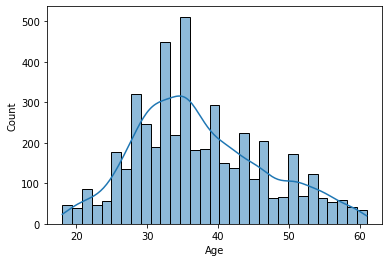

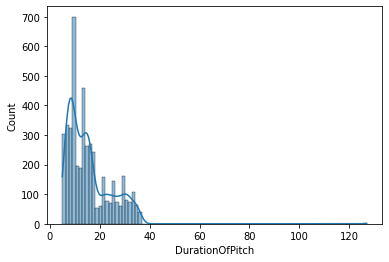

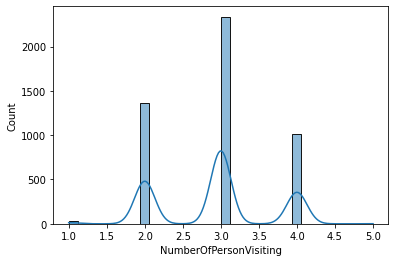

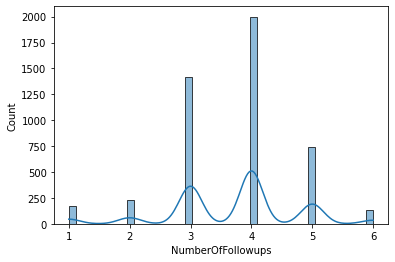

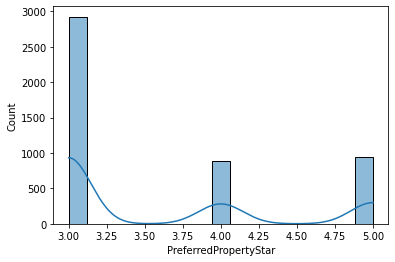

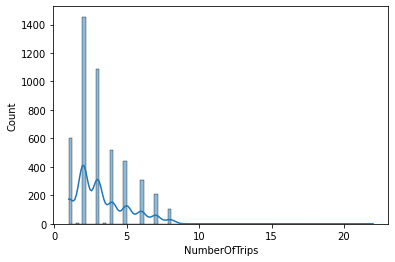

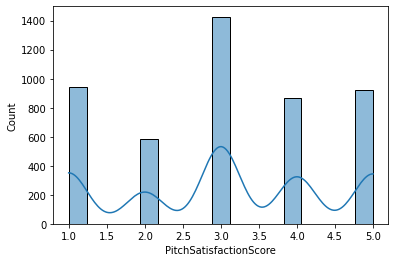

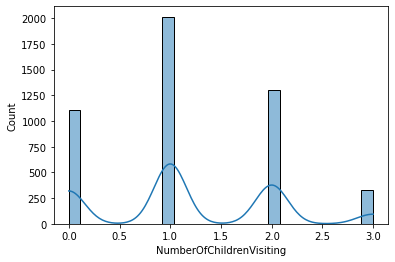

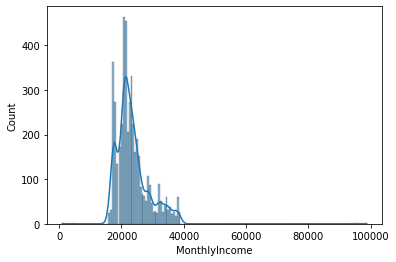

In [30]:
numerical_col = data.select_dtypes(exclude='category').columns.tolist()
for col in numerical_col:
  sns.histplot(data=data, x=col, kde=True);
  plt.show()

**Observations drawn from Histograms**

Age looks normally distributed with quite a few spikes

Duration of Pitch is right skewed

In most cases, the number of visitors is 3 with a maximum of 5 people visiting.

Number of follow-ups are mostly 4

Most customers seem to prefer a 3 star accommodation

Number of Trips is highly right skewed. Most people seem to have taken 2 trips a year.

Most customers have rated the pitch satisfaction a 3.

Most customers have 1 child accompanying.

Monthly income is right skewed.












**Outlier detection using Boxplot**

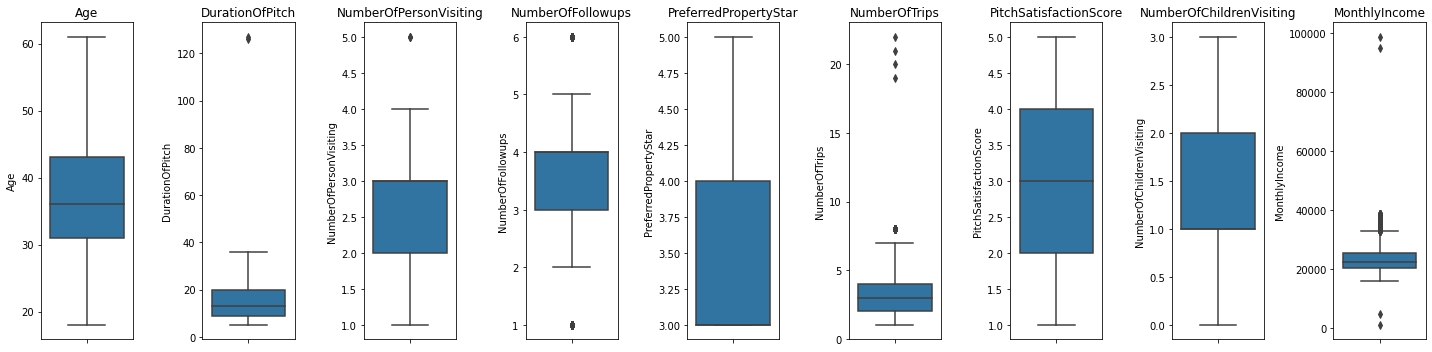

In [31]:
plt.figure(figsize=(20,5))

for i, variable in enumerate(numerical_col):
    plt.subplot(1,9,i+1)
    sns.boxplot(y=data[variable], orient='h')
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Outliers**

MonthlyIncome and NumberOfFollowups seem to contain outliers to the left as well as to the right.

DurationOfPitch, NumberOfPersonVisiting and NumberOfTrips seem to contain outliers to the right.

**Categorical Feature Analysis**


In [32]:
# Below code draws count plots for each categorical feature along with the percentages

def perc_on_bar(data: pd.DataFrame, cat_columns, target, hue=None, perc=True):
    '''
    The function takes a category column as input and plots bar chart with percentages on top of each bar
    '''
    
    subplot_cols = 2
    subplot_rows = int(len(cat_columns)/2 + 1)
    plt.figure(figsize=(16,5*subplot_rows))
    for i, col in enumerate(cat_columns):
        plt.subplot(subplot_rows,subplot_cols,i+1)
        order = data[col].value_counts(ascending=False).index  # Data order  
        ax=sns.countplot(data=data, x=col, palette = 'crest', order=order, hue=hue);
        for p in ax.patches:
            percentage = '{:.1f}%\n({})'.format(100 * p.get_height()/len(data[target]), p.get_height())
            # Added percentage and actual value
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + p.get_height() + 40
            if perc:
                plt.annotate(percentage, (x, y), ha='center', color='black', fontsize='medium'); # Annotation on top of bars
            plt.xticks(color='black', fontsize='medium', rotation= (-90 if col=='region' else 0));
            plt.tight_layout()
            plt.title(col.capitalize() + ' Percentage Count Plots \n\n')


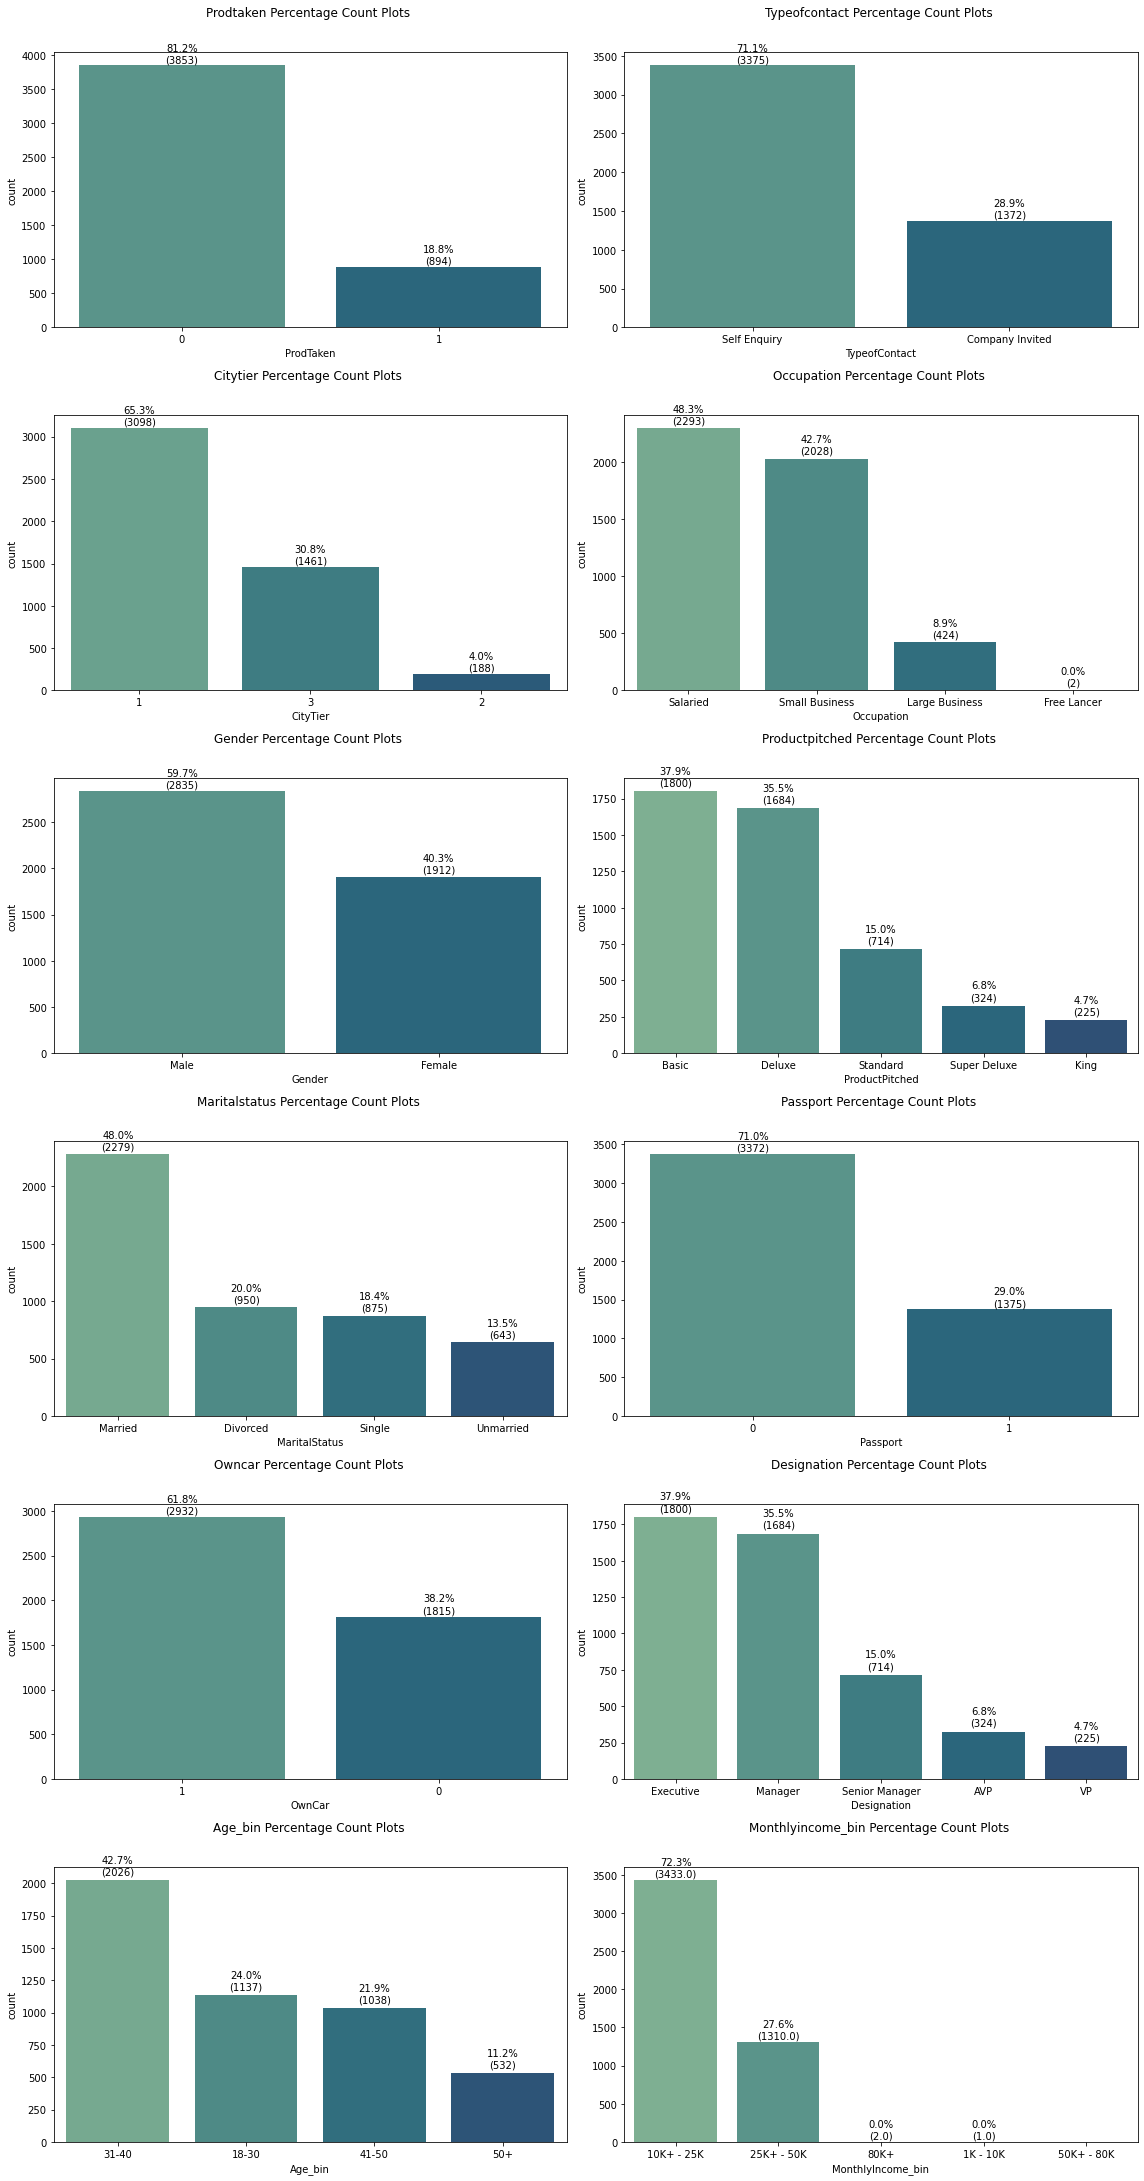

In [33]:
category_columns = data.select_dtypes(include='category').columns.tolist()
perc_on_bar(data, category_columns, 'ProdTaken')

**Observations drawn from the Count Plots:**

~38% customers are Executive, followed by 35% managers.

~18% customers accepted product offered last time.

~62% customer own car.

~29% customers have a passport.

~65% customers are from Tier 1 cities.

~61% customers prefer 3 star property.

~48% customers are married.

Basic package was pitched to ~38% of the customers and Delux was pitched to 35% of the customers.

~60% of the customers are male.

~49% of the customers are salaried(Occupation).

70.5% customer self-enquired about the packages.

~72% of customers make a monthly income in the 10K-25K range. 

~42% are in 31-40 Age group. Only ~11% customers are aged 50+

# Bivariate Analysis

Goal of Bi-variate analysis is to find inter-dependencies between features.

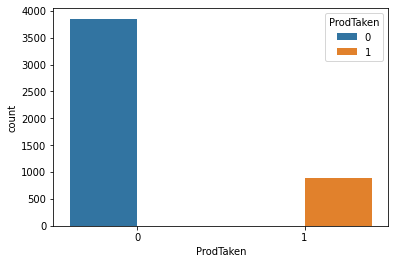

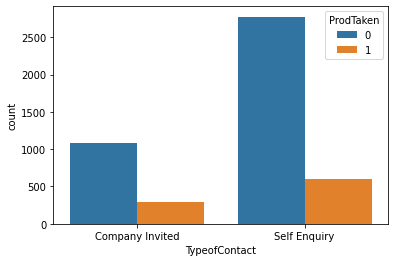

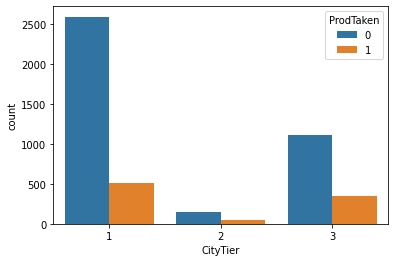

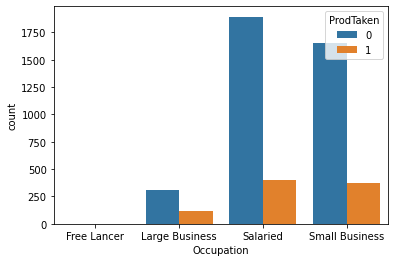

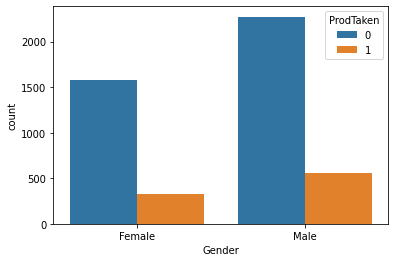

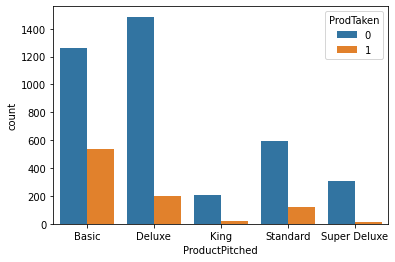

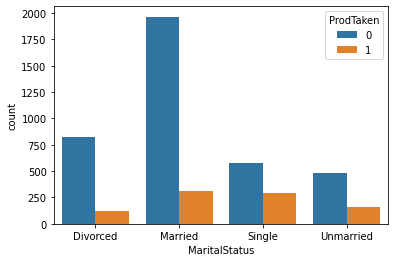

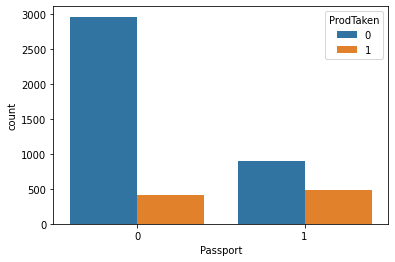

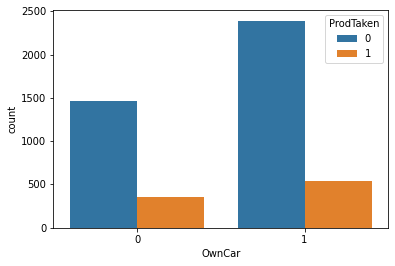

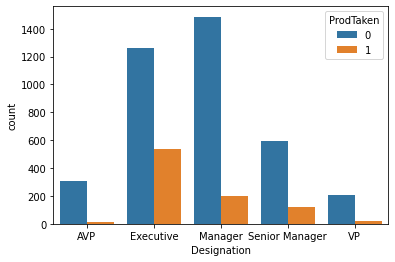

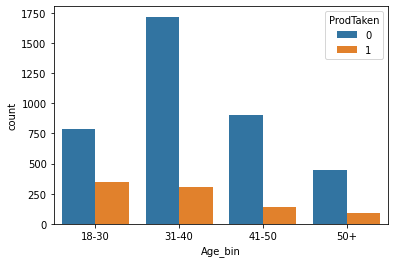

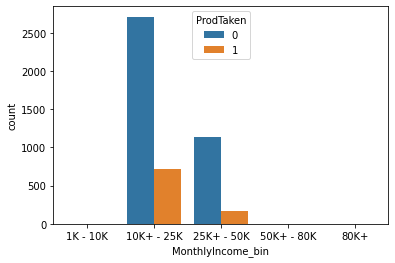

In [34]:
for col in category_columns:
  sns.countplot(data=data, x=col, hue='ProdTaken');
  plt.show()

**Observations**

Most of the customers did self-enquiry. However, whether customer chose to take a product or not, appears to be not dependent on type of contact.

Most of the customers are from Tier 1 Cities. Tier 2 and 3 residents seem to be slightly more interested in purchasing travel packages.

Most of the customers are salaried or running Small Business. Other than that, customers with large businesses tend to opt for purchasing a package more than salaried and small business running people.

Tendency of purchasing a travel package doesn't seem to be impacted by the gender of customer.

Deluxe and Basic are the two packages pitched to most of the customers.
People tend to purchase travel package more when they were pitched with Basic package, and Standard package.

Most of the customers are married. However Single and Unmarried people tend to buy travel package more than the rest.

Most of the customers are in the 10K+ to 25K monthly income range.

Most of the customers do not have a passport. But customers who have a passport seem to have purchased the package a lot more.

Most of the customers seem to own a car. However, owning a car does not seem to have any impact on the purchasing tendency.

Most of the customers are Executives and Managers. Executives seems to have purchased the package a lot more than the rest.

Most of the customers are in the 31-40 year age group. However
18-30 age group seem to have purchased more. 


















# Multi-variate Analysis

**Pair Plot of the numerical columns hued by ProdTaken**



<Figure size 1440x1440 with 0 Axes>

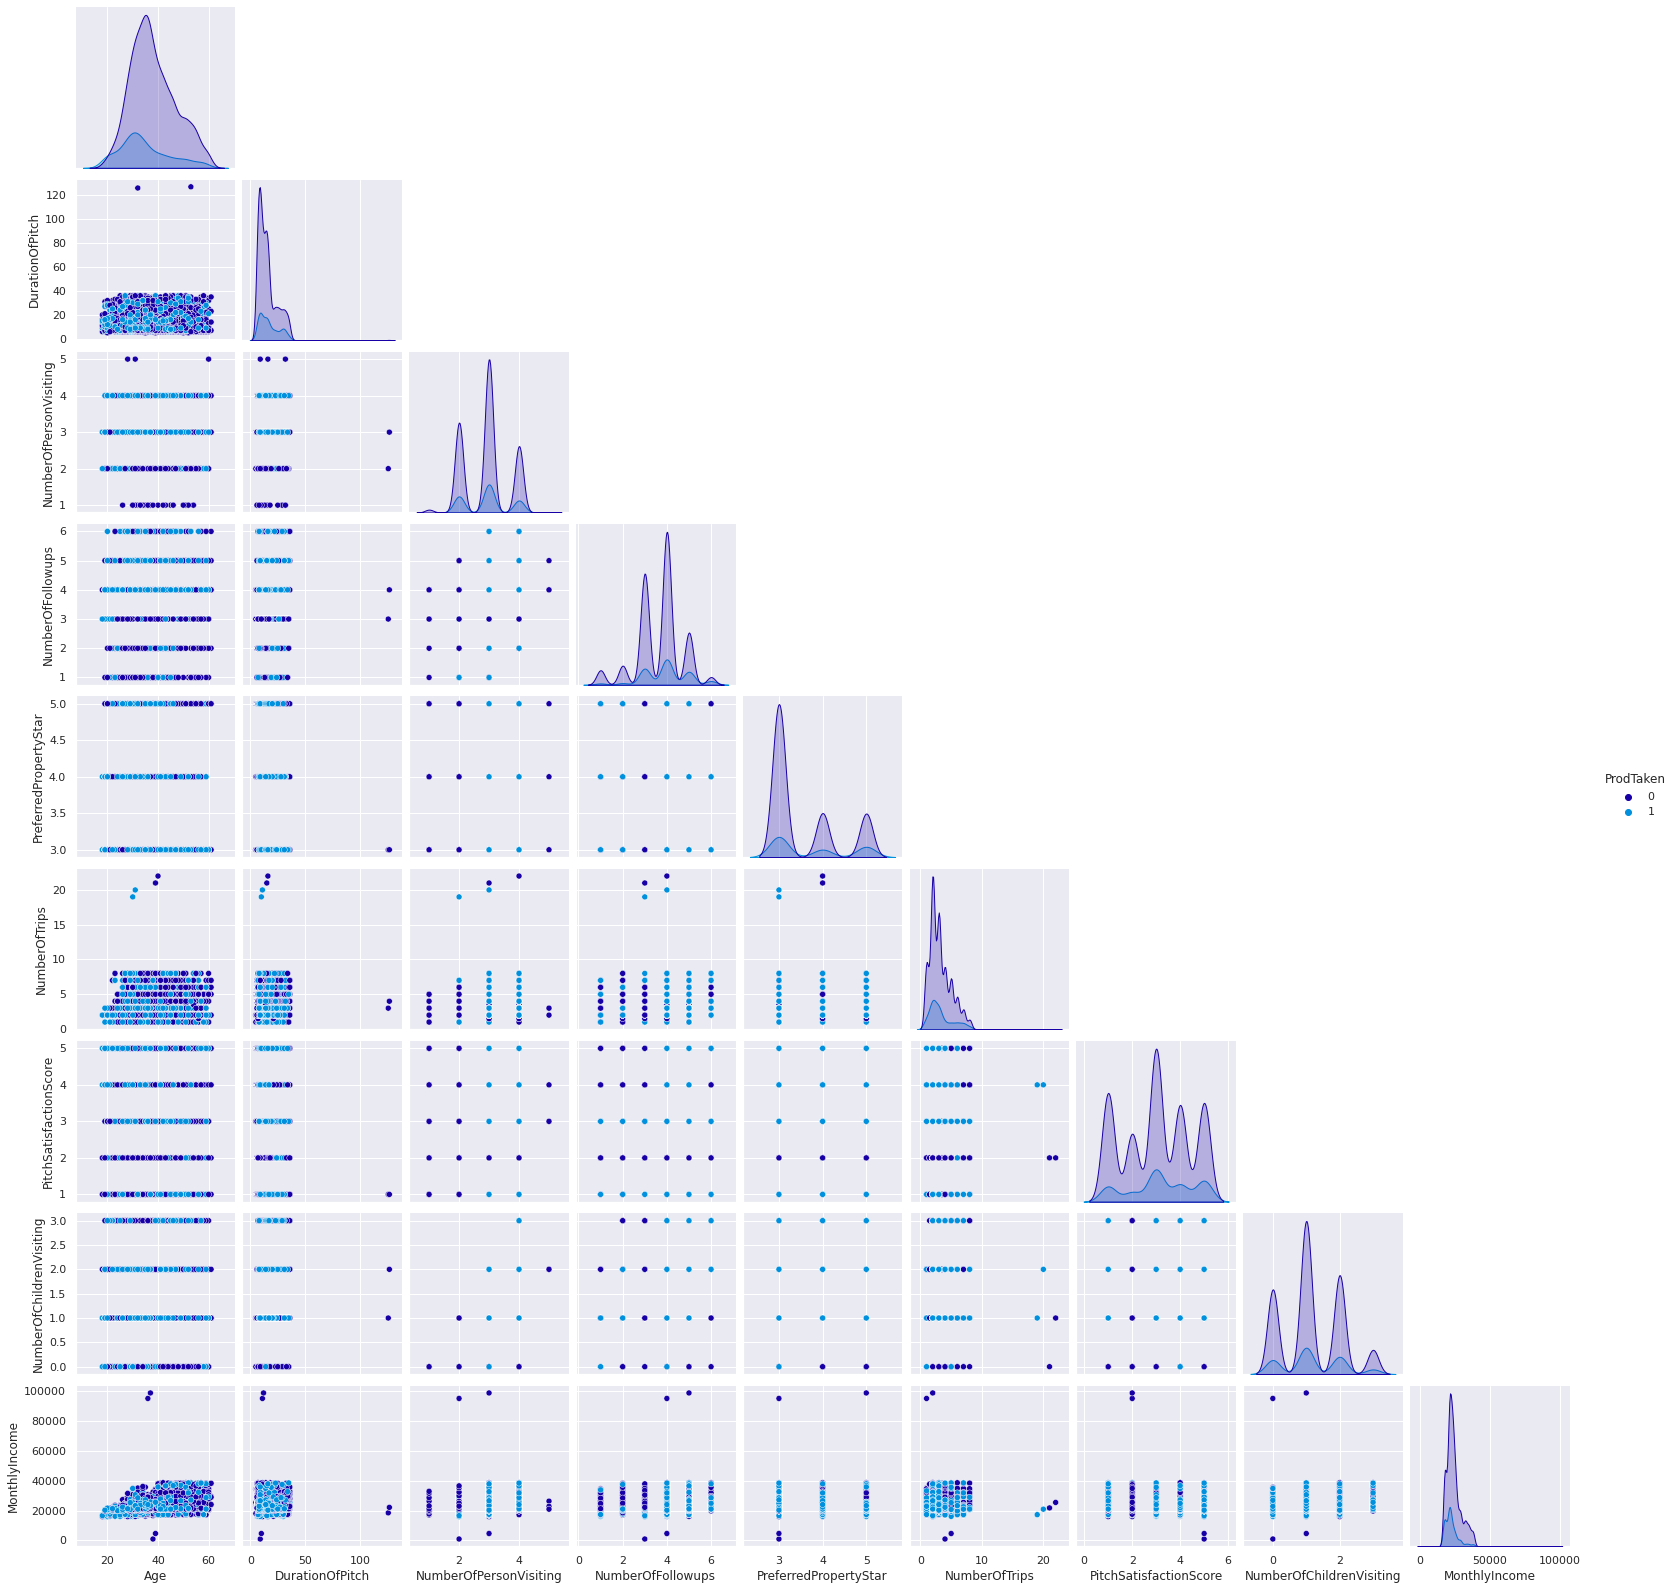

In [35]:
# Below plot shows correlations between the numerical features in the dataset

plt.figure(figsize=(20,20));
sns.set(palette="nipy_spectral");
sns.pairplot(data=data, hue='ProdTaken', corner=True);

**Heatmap to plot the correlations between the numerical columns.**

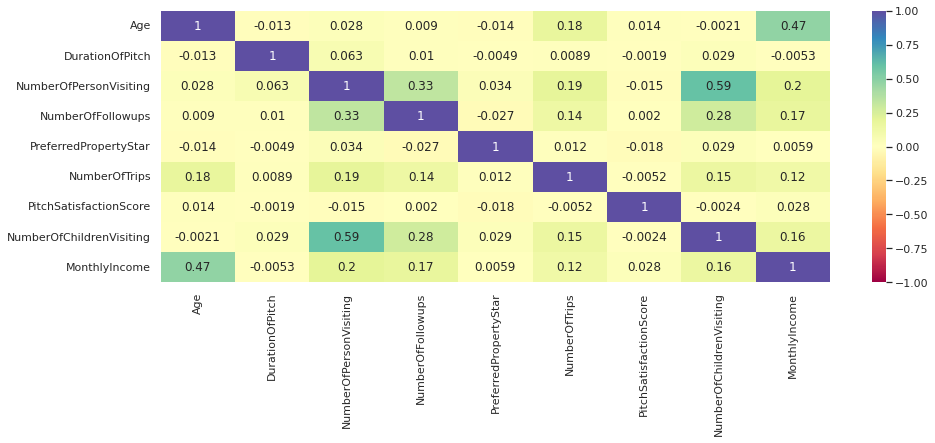

In [36]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap='Spectral');

Age and MonthlyIncome have a postive correlation of 0.47 - this correlation is expected as the more experience one gains, the higher up they go and earning more in the process.

NumberOfPersonVisiting is also as expected positively correlated with NumberOfChildrenVisiting.

# Customer Profiling

In [37]:
#Lets create a subset out of the primary dataset with only the customers that purchased the product
data_prodpurchased = data[data['ProdTaken'] == 1]
data_prodpurchased.shape

(894, 21)

**We have 894 customers that have purchased the travel package(s).**
**We will use this subset, data_prodpurchased for building the customer profile for each product type.**

**Income and Age Statistics at a Product Purchased Level**

**Bar plot of Monthly Income vs Product Purchased**

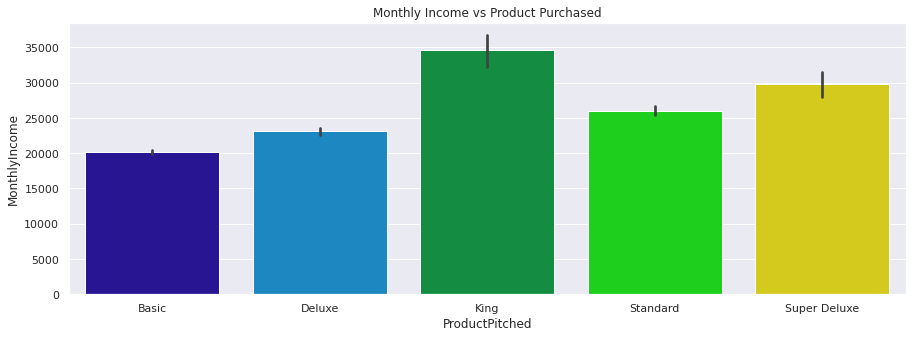

In [38]:
plt.figure(figsize=(15,5))
sns.barplot(data=data_prodpurchased, y='MonthlyIncome', x='ProductPitched').set_title('Monthly Income vs Product Purchased');
plt.show()


**Bar plot of Age vs Product Purchased**

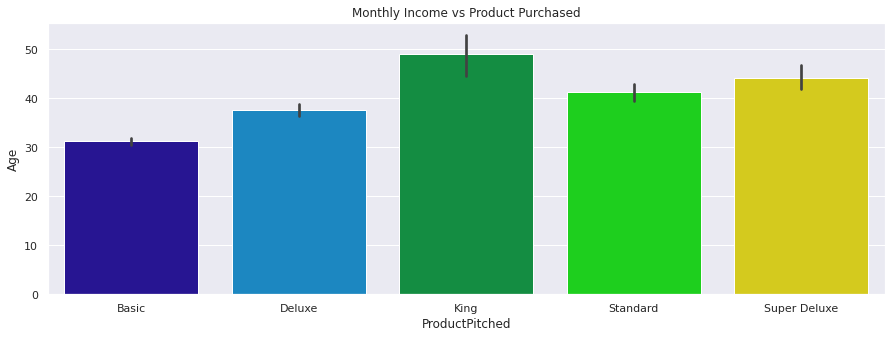

In [39]:
plt.figure(figsize=(15,5))
sns.barplot(data=data_prodpurchased, y='Age', x='ProductPitched').set_title('Monthly Income vs Product Purchased');
plt.show()

In [40]:
data_prodpurchased.groupby(['ProductPitched']).agg({'MonthlyIncome':{'mean','min','max'},'Age':{'mean','min','max'}})

MonthlyIncome                          Age                 
                         min          mean      max   min       mean   max
ProductPitched                                                            
Basic                16009.0  20185.562037  37868.0  18.0  31.211111  59.0
Deluxe               17086.0  23091.919192  38525.0  21.0  37.631313  59.0
King                 17517.0  34672.100000  38537.0  27.0  48.900000  59.0
Standard             17372.0  26016.433333  38395.0  19.0  41.191667  60.0
Super Deluxe         21151.0  29829.125000  37502.0  39.0  44.125000  56.0

**Count per Category for each type of product purchased**

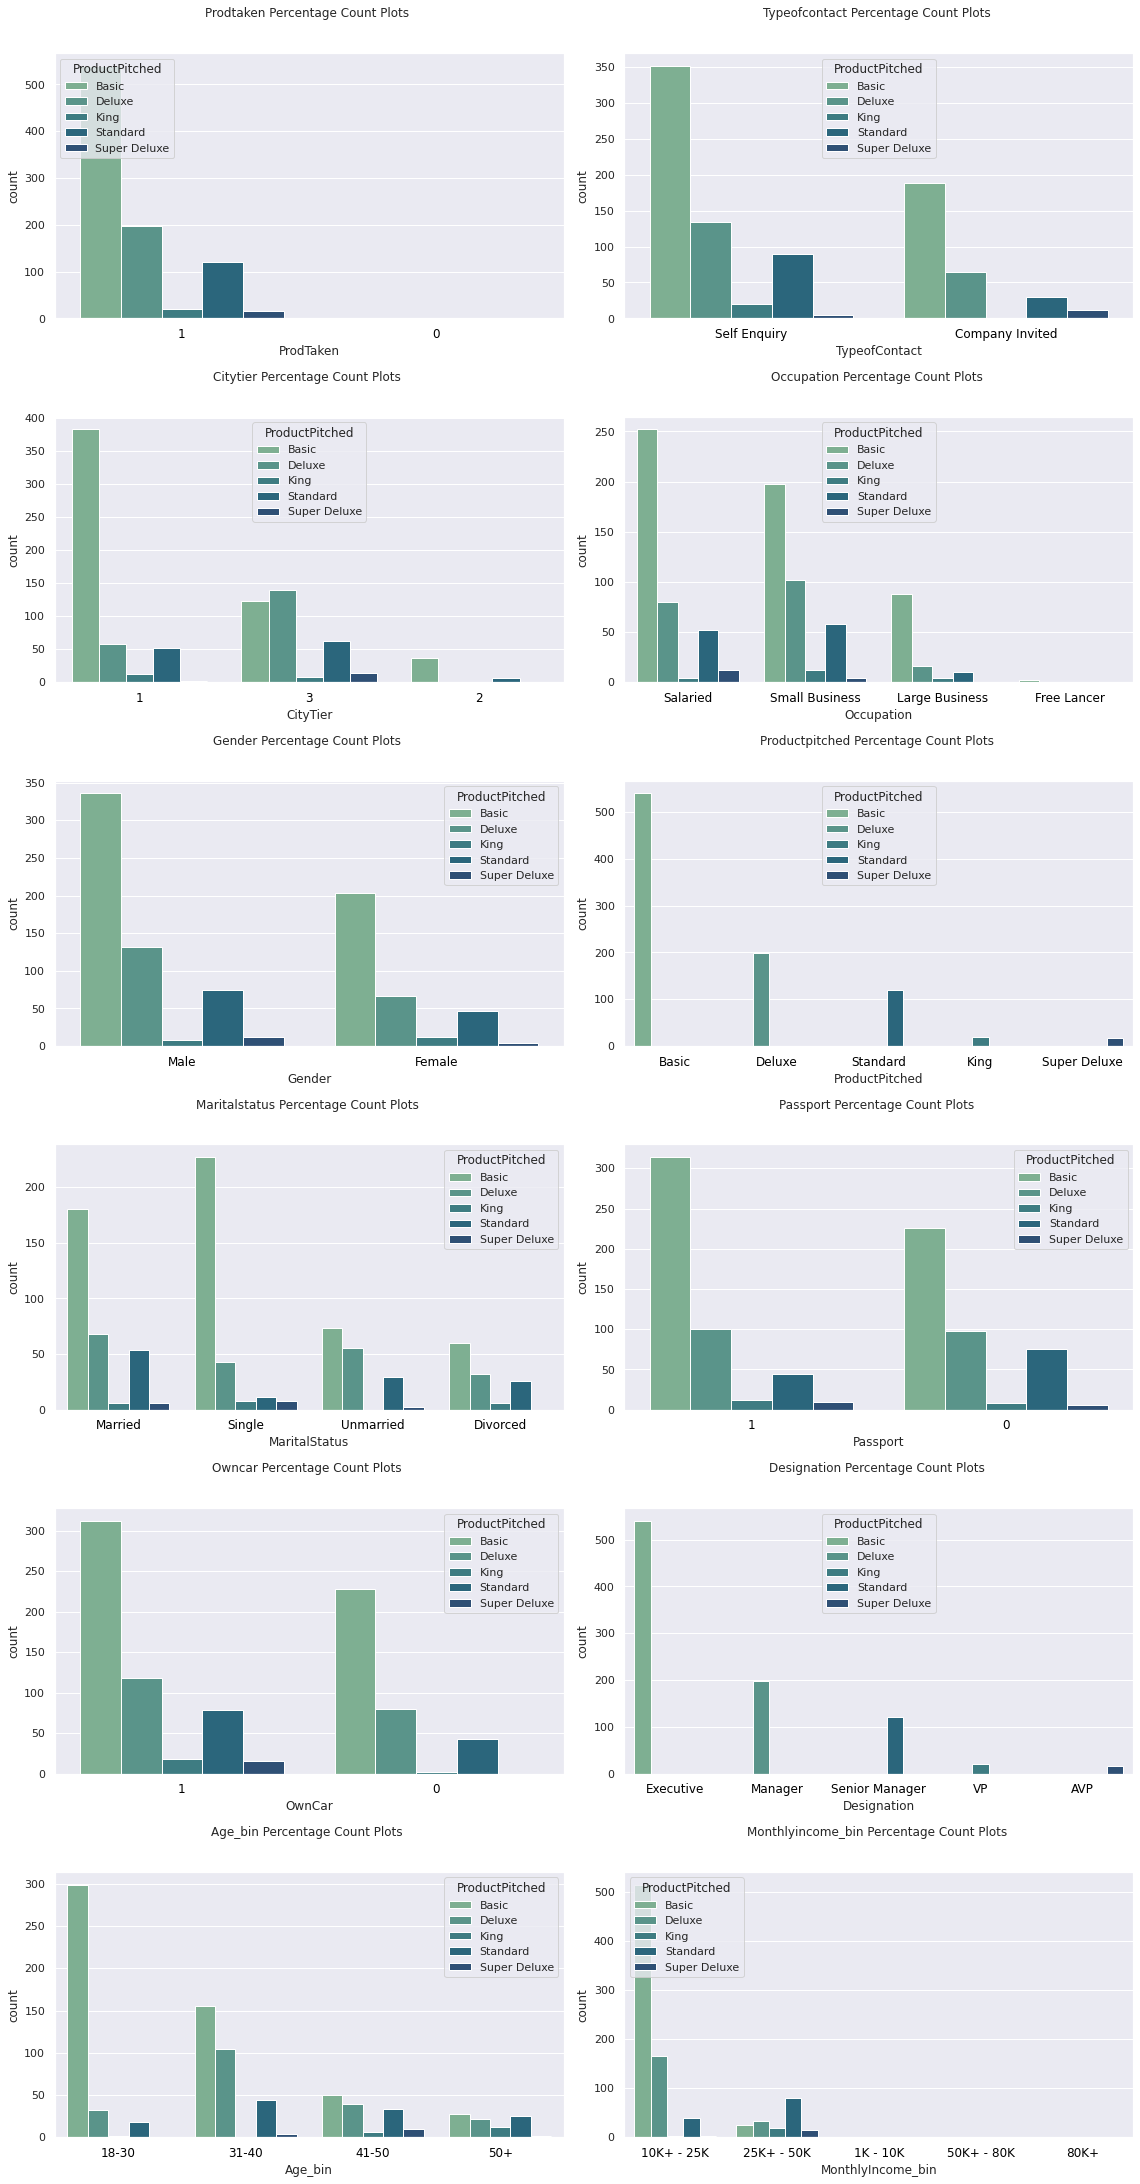

In [41]:
perc_on_bar(data_prodpurchased, category_columns, 'ProdTaken', hue='ProductPitched', perc=False)

**Statistics for Basic Package Purchases**

In [42]:
data_prodpurchased[data_prodpurchased['ProductPitched'] =='Basic'].describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,540.0,1.0,1.0,540.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,540.0,NaN,NaN,NaN,31.211111,8.816616,18.0,26.0,30.0,34.0,59.0
TypeofContact,540,2,Self Enquiry,352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,540.0,3.0,1.0,382.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,520.0,NaN,NaN,NaN,15.736538,7.899526,6.0,9.0,14.0,22.0,36.0
Occupation,540,4,Salaried,252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,540,2,Male,336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,540.0,NaN,NaN,NaN,2.911111,0.702148,2.0,2.0,3.0,3.0,4.0
NumberOfFollowups,536.0,NaN,NaN,NaN,3.949627,0.968321,1.0,3.0,4.0,5.0,6.0
ProductPitched,540,1,Basic,540,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Customer Profiling - Basic Package**

**Trend observed in customers that purchased the Basic Package:**

Age Group: 25 - 35

Contacted by: Self

Gender: Male

City Tier: 1

Occupation: Salaried

Number of Persons Visiting: 2 - 3

Marital Status: Single

Designation: Executives

Monthly Income Mean: ~20K

**Statistics for Standard Package Purchases**

In [43]:
data_prodpurchased[data_prodpurchased['ProductPitched'] =='Standard'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,120.0,1.0,1.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,120.0,NaN,NaN,NaN,41.191667,9.938716,19.0,33.0,38.5,49.0,60.0
TypeofContact,120,2,Self Enquiry,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,120.0,3.0,3.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,119.0,NaN,NaN,NaN,19.033613,9.030957,6.0,11.0,17.0,28.0,36.0
Occupation,120,3,Small Business,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,120,2,Male,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,120.0,NaN,NaN,NaN,2.983333,0.709874,2.0,2.0,3.0,3.0,4.0
NumberOfFollowups,120.0,NaN,NaN,NaN,3.95,0.915322,1.0,3.0,4.0,5.0,6.0
ProductPitched,120,1,Standard,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN


****Customer Profiling - Standard Package****

**Trend observed in customers that purchased the Standard Package:**

Age Group: 33 - 49

Contacted by: Self

Gender: Male

City Tier: 3

Occupation: Small Business

Number of Persons Visiting: 2 - 3

Marital Status: Married

Designation: Senior Managers

Monthly Income Mean: ~26K

**Statistics for Deluxe Package Purchases**

In [44]:
data_prodpurchased[data_prodpurchased['ProductPitched'] =='Deluxe'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,198.0,1.0,1.0,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,198.0,NaN,NaN,NaN,37.631313,8.447535,21.0,32.0,36.0,44.0,59.0
TypeofContact,198,2,Self Enquiry,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,198.0,2.0,3.0,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,175.0,NaN,NaN,NaN,19.062857,9.217147,6.0,11.0,16.0,28.0,36.0
Occupation,198,3,Small Business,102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,198,2,Male,132,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,198.0,NaN,NaN,NaN,2.954545,0.707433,2.0,2.0,3.0,3.0,4.0
NumberOfFollowups,194.0,NaN,NaN,NaN,3.974227,1.06004,1.0,3.0,4.0,5.0,6.0
ProductPitched,198,1,Deluxe,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


****Customer Profiling - Deluxe Package****

**Trend observed in customers that purchased the Deluxe package:**

Age Group: 21 - 44

Contacted by: Self

Gender: Male

City Tier: 3

Occupation: Small Business

Number of Persons Visiting: 2 - 3

Marital Status: Married

Designation: Manager

Monthly Income Mean: ~23K

**Statistics for Super Deluxe Package Purchases**

In [45]:
data_prodpurchased[data_prodpurchased['ProductPitched'] =='Super Deluxe'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,16.0,1.0,1.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,16.0,NaN,NaN,NaN,44.125,5.188127,39.0,40.75,42.0,46.25,56.0
TypeofContact,16,2,Company Invited,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,16.0,2.0,3.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,16.0,NaN,NaN,NaN,19.75,7.28011,8.0,15.75,19.0,22.5,31.0
Occupation,16,2,Salaried,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,16,2,Male,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,16.0,NaN,NaN,NaN,2.75,0.68313,2.0,2.0,3.0,3.0,4.0
NumberOfFollowups,16.0,NaN,NaN,NaN,3.0,1.788854,1.0,1.75,2.5,4.25,6.0
ProductPitched,16,1,Super Deluxe,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN


****Customer Profiling - Super Deluxe Package****

**Trend observed in customers that purchased the Super Deluxe package:**

Age Group: 40 - 46

Contacted by: Company Invitation

Gender: Male

City Tier: 3

Occupation: Salaried

Number of Persons Visiting: 2 - 3

Marital Status: Single

Designation: AVP

Monthly Income Mean: ~30K

**Statistics for King Package Purchases**

In [46]:
data_prodpurchased[data_prodpurchased['ProductPitched'] =='King'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,20.0,1.0,1.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,20.0,NaN,NaN,NaN,48.9,9.618513,27.0,42.0,52.5,56.0,59.0
TypeofContact,20,1,Self Enquiry,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,20.0,2.0,1.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,20.0,NaN,NaN,NaN,10.5,4.135851,8.0,8.0,9.0,9.0,19.0
Occupation,20,3,Small Business,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,20,2,Female,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,20.0,NaN,NaN,NaN,2.9,0.718185,2.0,2.0,3.0,3.0,4.0
NumberOfFollowups,20.0,NaN,NaN,NaN,4.3,1.128576,3.0,3.0,4.0,5.0,6.0
ProductPitched,20,1,King,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


****Customer Profiling - King Package****

**Trend observed in customers that purchased the King package:**

Age Group: 42 - 56

Contacted by: Self

Gender: Female

City Tier: 1

Occupation: Small Business

Number of Persons Visiting: 2 - 3

Marital Status: Single

Designation: VP

Monthly Income Mean: ~34K

# Insights from EDA


Customer from 18 - 30 age purchased the package, followed by 31 - 40 age group.

Customers with a Monthly Income of 15K - 25K purchased package, followed by customers in income range 25K - 50K.

Mostly customers visiting with 2 - 4 travelers purchased the package.

Most of the customers who bought the product were Executives, Managers and Senior Managers.

Customers who were followed up 6 times had purchased the package.

Company invited customers mostly purchased packages and preferred 5 star rated properties and were mostly from tier 2 and tier 3 cities. 

Customers who were pitched basic package mostly brought the product, followed by standard. Most likely this is due to the cost involved. 

Most customers that had a passport bought the package.

FreeLancers and Large Business owners have higher chance of purchasing the travel package. However, since there are only 2 data points for freelancers, this conclusion might be biased.

Single and unmarried people have higher chance of purchasing the travel package.

Customers who took 7 - 8 trips had higher chances of purchasing the package.

Number of children visiting, owning a car dont seem to influence the outcome.

Products were sold when followed up many times, with higher duration of product pitch, and when Basic Package was offered.

# Outlier Detection and Correction

3 columns NumberOfTrips,NumberOfPersonVisiting and MonthlyIncome indicate existence of outliers. NumberOfPersonVisiting has values between 1 and 5 with 3 as the mean & median. Since it is a very small range, we could ignore 5 being marked as an outlier. Let us take a closer look at the remaining 2 columns: NumberOfTrips and MonthlyIncome. Let us see how many of these extreme cases exist and decide if we want to drop them or clip them. 

In [47]:
#Determine the lower_limit and upper_limit (Formulas: Q1-1.5*IQR and Q3+1.5*IQR respectively)
def calculate_limits(data,colmn):
  # Q1 = 25th quantile
    Q1=data[colmn].quantile(0.25)
    
    # Q3 = 75th quantile
    Q3=data[colmn].quantile(0.75)
    
    # Calculating IQR
    IQR=Q3-Q1
    
    # Setting lower limit to Q1-1.5*IQR
    lower_limit = Q1 - 1.5*IQR
    if lower_limit < 0:
        lower_limit = 0

    # Setting upper limit to Q3+1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    
    return lower_limit, upper_limit

In [48]:
# Detection and removal of outliers
def handle_outliers(data,colmn, lower_limit, upper_limit):
    
    # Overwriting values lesser than the lower_limit with the lower_limit
    # Overwriting values greater than the upper_limit with the upper_limit
    data[colmn] = np.clip(data[colmn], lower_limit, upper_limit) 
    
    # returning clipped data
    return data


**Outlier Detection in NumberOfTrips**

In [49]:
#NumberOfTrips had a max value of 22. Let us calculate the lower and upper limits using quantiles.
trips_lower_limit, trips_upper_limit = calculate_limits(data,'NumberOfTrips')
print ('Lower cap for NumberOfTrips',trips_lower_limit)
print ('Upper cap for NumberOfTrips', trips_upper_limit)

Lower cap for NumberOfTrips 0
Upper cap for NumberOfTrips 7.0


In [50]:
#Let us get the number of rows where NumberOfTrips>7 & let us see what values those rows hold.
temp = data[data['NumberOfTrips']>7]
print('Number of rows with more than 7 trips:', temp.shape[0])
temp['NumberOfTrips'].value_counts(1)

Number of rows with more than 7 trips: 106


8.0     0.962264
19.0    0.009434
21.0    0.009434
20.0    0.009434
22.0    0.009434
Name: NumberOfTrips, dtype: float64

96% of the rows have NumberOfTrips=8. The rest of the rows have extreme values of 19, 20, 21 and 22. Even one trip a month would make it 12 - so anything more than 12 is safe to be assumed as bad data. So lets clip the NumberOfTrips at 8.

**Outlier Correction in NumberOfTrips**

In [51]:
#Set the upper_limit to 8 and so all values greater than 8 will be replaced with 8.
data = handle_outliers(data,'NumberOfTrips',0,8)

In [52]:
data['NumberOfTrips'].value_counts()

2.0    1455
3.0    1089
1.0     601
4.0     522
5.0     444
6.0     307
7.0     211
8.0     106
3.5       8
1.5       4
Name: NumberOfTrips, dtype: int64

In [53]:
#Values 3.5 and 1.5 for the NumberOfTrips doesn't make sense. Let us round them up to 4 and 2 respectively.
data['NumberOfTrips'] = data['NumberOfTrips'].replace(3.5, 4)
data['NumberOfTrips'] = data['NumberOfTrips'].replace(1.5, 2)


**Outlier Detection in MonthlyIncome**

In [54]:
#MonthlyIncome had outliers both to the left and to the right. Let us calculate the lower and upper limits using quantiles.
income_lower_limit, income_upper_limit = calculate_limits(data,'MonthlyIncome')
print ('Lower cap for MonthlyIncome',income_lower_limit)
print ('Upper cap for MonthlyIncome', income_upper_limit)


Lower cap for MonthlyIncome 12947.75
Upper cap for MonthlyIncome 32853.75


In [55]:
temp = data[data['MonthlyIncome']>32852.5]
print('Number of customers with Monthly Income greater than 32852.5:',temp.shape[0])



Number of customers with Monthly Income greater than 32852.5: 360


In [56]:
#Let us get a statistical summary of the 360 customers who make more than 32,852.5k.
temp['MonthlyIncome'].describe()


count      360.000000
mean     36075.480556
std       4869.817353
min      32856.000000
25%      34235.750000
50%      35523.500000
75%      37531.000000
max      98678.000000
Name: MonthlyIncome, dtype: float64

In [57]:
#Lets get an idea of the number of customers who make more than 40,000 - just rounding up 37,531 (which is at the 3rd quantile)
temp[temp['MonthlyIncome']>40000]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Age_bin,MonthlyIncome_bin
38,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,...,Divorced,1.0,1,2,1,0.0,Executive,95000.0,31-40,80K+
2482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,...,Divorced,2.0,1,2,1,1.0,Executive,98678.0,31-40,80K+


It is 2 customers who are making high income in upwards of 90K. Both customers are Salaried Female Executives. Let us check the median income for this category.

In [58]:
data[data['Gender']=='Female'].groupby(['Occupation', 'Designation', 'CityTier']).agg({'MonthlyIncome':{'mean','median','max'}})

MonthlyIncome                       
                                              median          mean      max
Occupation     Designation    CityTier                                     
Free Lancer    AVP            1                  NaN           NaN      NaN
                              2                  NaN           NaN      NaN
                              3                  NaN           NaN      NaN
               Executive      1                  NaN           NaN      NaN
                              2                  NaN           NaN      NaN
                              3                  NaN           NaN      NaN
               Manager        1                  NaN           NaN      NaN
                              2                  NaN           NaN      NaN
                              3                  NaN           NaN      NaN
               Senior Manager 1                  NaN           NaN      NaN
                              2                  NaN           NaN      NaN
                              3                  NaN           NaN      NaN
               VP             1                  NaN           NaN      NaN
                              2                  NaN           NaN      NaN
                              3                  NaN           NaN      NaN
Large Business AVP            1              31762.0  31282.500000  35382.0
                              2                  NaN           NaN      NaN
                              3              31887.5  32495.333333  35550.0
               Executive      1              20748.0  20476.904762  34802.0
                              2              20915.0  20915.000000  24088.0
                              3              19518.5  19326.400000  21880.0
               Manager        1              21687.0  20091.900000  25365.0
                              2                  NaN           NaN      NaN
                              3              22545.0  22628.384615  25530.0
               Senior Manager 1              28332.5  27186.210526  32260.0
                              2                  NaN           NaN      NaN
                              3              26577.0  26577.000000  28416.0
               VP             1              36583.0  36583.000000  38621.0
                              2                  NaN           NaN      NaN
                              3                  NaN           NaN      NaN
Salaried       AVP            1              31752.0  31933.837209  35558.0
                              2              33902.5  33990.666667  36006.0
                              3              31890.0  32590.933333  36553.0
               Executive      1              20741.5  20395.899281  98678.0
                              2              20861.5  21320.555556  36539.0
                              3              20711.0  20114.500000  32255.0
               Manager        1              22692.0  22417.853535  28393.0
                              2              22635.5  22673.200000  25067.0
                              3              23165.0  22717.991071  28659.0
               Senior Manager 1              26795.5  26893.204082  32422.0
                              2              26232.5  26353.333333  28628.0
                              3              26315.0  27000.823529  38395.0
               VP             1              36850.0  36119.434783  38651.0
                              2              36090.0  35954.333333  38336.0
                              3              34880.0  34880.000000  36719.0
Small Business AVP            1              32412.0  32459.888889  36534.0
                              2                  NaN           NaN      NaN
                              3              31998.0  31615.846154  35726.0
               Executive      1              20761.0  19905.752632  23417.0
                              2              19728.0  19481.000000  22347.0
           

Salaried Female Executives living in Tier 1 cities seem to be making ~21k. So these rows seem to hold incorrect data. Updating the income with the median value from the same category (Female, Salaried, Executive living in a Tier 1 City)

In [59]:
data['MonthlyIncome'] = data['MonthlyIncome'].replace(98678.0, 20347.58)
data['MonthlyIncome'] = data['MonthlyIncome'].replace(95000.0, 20347.58)

In [60]:
#Now let us inspect the customers who make below the lower limit of 12,952.5.
data[data['MonthlyIncome']<12952.5]



,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Age_bin,MonthlyIncome_bin
142,0,38.0,Self Enquiry,1,9.0,Large Business,Female,2,3.0,Deluxe,...,Single,4.0,1,5,0,0.0,Manager,1000.0,31-40,NaN
2586,0,39.0,Self Enquiry,1,10.0,Large Business,Female,3,4.0,Deluxe,...,Single,5.0,1,5,0,1.0,Manager,4678.0,31-40,1K - 10K


It is only 2 customers that seem to be making an income below the calculated lower limit. 
Neither of these entries look right as both customers are Managers working in Large Business, living in Tier 1 cities, holding passports. Both the customers were pitched the Deluxe Product (which is costlier than Basic and Standard packages). Let us rectify the income for these 2 entries - let us use the income median from observations that have the same Designation(Manager), Occupation(Large Business), Gender(Female) and CityTier(1).

In [61]:
data[data['Designation']=='Manager'].groupby(['Occupation', 'Gender', 'CityTier']).agg({'MonthlyIncome':{'mean','median','max'}})

MonthlyIncome                       
                                      median          mean      max
Occupation     Gender CityTier                                     
Free Lancer    Female 1                  NaN           NaN      NaN
                      2                  NaN           NaN      NaN
                      3                  NaN           NaN      NaN
               Male   1                  NaN           NaN      NaN
                      2                  NaN           NaN      NaN
                      3                  NaN           NaN      NaN
Large Business Female 1              21687.0  20091.900000  25365.0
                      2                  NaN           NaN      NaN
                      3              22545.0  22628.384615  25530.0
               Male   1              22765.0  22320.086957  26057.0
                      2                  NaN           NaN      NaN
                      3              21929.0  22613.357143  27024.0
Salaried       Female 1              22692.0  22417.853535  28393.0
                      2              22635.5  22673.200000  25067.0
                      3              23165.0  22717.991071  28659.0
               Male   1              22736.0  22722.814685  38525.0
                      2              22656.5  22827.900000  25108.0
                      3              23327.0  23251.835366  36739.0
Small Business Female 1              23055.0  22688.731250  28686.0
                      2                  NaN           NaN      NaN
                      3              23103.0  22676.120690  28532.0
               Male   1              22891.0  22524.052941  37467.0
                      2              22485.5  22485.500000  24950.0
                      3              23005.0  22833.881679  28585.0

In [62]:
#The median income for a Female Manager in a Large Business living in a Tier 1 city is 21,687. We will use this median to replace
#the erroneous values of 1000 & 4678. 
data['MonthlyIncome'] = data['MonthlyIncome'].replace(1000.0, 21687.0)
data['MonthlyIncome'] = data['MonthlyIncome'].replace(4678.0, 21687.0)

In [63]:
#Doublecheking that we no longer have any entries with MonthlyIncome below the lower_limit of 12952.5
data[data['MonthlyIncome']<12952.5].shape[0]

0

# Data Preparation for Modeling

# Columns not being considered for Model Building

Since the new customers will be first be analyzed via the model and then contacted, the customer interaction data would not be available. Hence my decision to drop the 4 features (**DurationOfPitch, ProductPitched,PitchSatisfactionScore,NumberOfFollowups**) related to customer interactions.


In [64]:
data.drop('DurationOfPitch', axis=1, inplace=True)
data.drop('ProductPitched', axis=1, inplace=True)
data.drop('PitchSatisfactionScore', axis=1, inplace=True)
data.drop('NumberOfFollowups', axis=1, inplace=True)

In [65]:
#Dropping the 2 bins created for EDA purposes
data.drop('Age_bin', axis=1, inplace=True)
data.drop('MonthlyIncome_bin', axis=1, inplace=True)

In [66]:
#We only have 2 rows with the Occupation type as Free Lancer, very little data to make meaningful predictions. 
#Hence dropping the 2 observations. 
data = data[data['Occupation']!='Free Lancer']

In [67]:
# Label/Ordinal encoding as we want to maintain the order/ranking.
data['Designation'] = data['Designation'].replace({'Executive':0,'Manager':1, 'Senior Manager':2, 
                                                     'AVP':3, 'VP':4})

# One Hot encoding
oneHotCols=['Occupation','MaritalStatus','Gender','Passport','CityTier','OwnCar', 'TypeofContact']

data=pd.get_dummies(data, columns=oneHotCols, drop_first=True)


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4745 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ProdTaken                   4745 non-null   category
 1   Age                         4745 non-null   float64 
 2   NumberOfPersonVisiting      4745 non-null   int64   
 3   PreferredPropertyStar       4745 non-null   float64 
 4   NumberOfTrips               4745 non-null   float64 
 5   NumberOfChildrenVisiting    4745 non-null   float64 
 6   Designation                 4745 non-null   int64   
 7   MonthlyIncome               4745 non-null   float64 
 8   Occupation_Large Business   4745 non-null   uint8   
 9   Occupation_Salaried         4745 non-null   uint8   
 10  Occupation_Small Business   4745 non-null   uint8   
 11  MaritalStatus_Married       4745 non-null   uint8   
 12  MaritalStatus_Single        4745 non-null   uint8   
 13  MaritalStatus_Unma

In [69]:
X = data.drop('ProdTaken', axis=1)
y = data['ProdTaken']

In [70]:
data['ProdTaken'].value_counts(1)

0    0.812013
1    0.187987
Name: ProdTaken, dtype: float64

In [71]:
# splitting into data train and test (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)

In [72]:
X_train.columns

Index(['Age', 'NumberOfPersonVisiting', 'PreferredPropertyStar',
       'NumberOfTrips', 'NumberOfChildrenVisiting', 'Designation',
       'MonthlyIncome', 'Occupation_Large Business', 'Occupation_Salaried',
       'Occupation_Small Business', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MaritalStatus_Unmarried', 'Gender_Male',
       'Passport_1', 'CityTier_2', 'CityTier_3', 'OwnCar_1',
       'TypeofContact_Self Enquiry'],
      dtype='object')

In [73]:
print(y_train.value_counts(1))

0    0.812105
1    0.187895
Name: ProdTaken, dtype: float64


In [74]:
print(y_test.value_counts(1))

0    0.811798
1    0.188202
Name: ProdTaken, dtype: float64


We had seen that around 81% of observations belong to class 0 (Tour package not purchased) and 19% observations belong to class 1 (Tour package was purchased), and this ratio is preserved in the train and test sets.

# Model Building

**Model Evaluation**


**Model evaluation criterion**

Model can make wrong predictions as:

Predicting a customer will not purchase the package but in reality, the customer will purchase (FN). Predicting a customer will purchase the package, but in reality the customer will not purchase the package (FP). Which case is more important?

**False Negative** If we incorrectly predict that a customer will not purchase the package, it is loss of opportunity where a potential customer is lost. Identifying the potential customes is the goal of the model. 

**False Positive** If we incorrectly predict that a customer will purchase the package, its loss of resources as the sales team will be targeting a customer who is not going to purchase the package. 

**BottomLine - We want the False Negatives to be at a minimum.**

**The company would want the recall to be maximized. Greater the recall score, higher are the chances of minimizing the False Negatives.**

**Class Weightage**

Since the frequency of class 0 (not purchased) is 81% and the frequency of class 1 (prod purchased) is %19, class 0 will become the dominant class and the algorithms will become biased toward the dominant classes. To handle this imbalanced data set, we can pass a dictionary {0:0.19,1:0.81} to the model to specify the weight of each class and the algorithms will give more weightage to class 1. 

**Model Evaluation Functions - Scoring & Confusion Matrix**

In [75]:
#Function to draw the confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [76]:
##  Function to calculate different metric scores of the model - Accuracy, Recall, Precision and F1
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = recall_score(y_train,pred_train)
    test_recall = recall_score(y_test,pred_test)
    
    train_precision = precision_score(y_train,pred_train)
    test_precision = precision_score(y_test,pred_test)

    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",recall_score(y_train,pred_train))
        print("Recall on test set : ",recall_score(y_test,pred_test))
        print("Precision on training set : ",precision_score(y_train,pred_train))
        print("Precision on test set : ",precision_score(y_test,pred_test))
        print("F1 on training set : ",f1_score(y_train,pred_train))
        print("F1 on test set : ",f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [77]:
# # defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

def add_score_model(score):
    '''Add scores to list so that we can compare metrics from all the models'''   
    acc_train.append(score[0])
    acc_test.append(score[1])
    recall_train.append(score[2])
    recall_test.append(score[3])
    precision_train.append(score[4])
    precision_test.append(score[5])
    f1_train.append(score[6])
    f1_test.append(score[7])

# Bagging Classifier

**Building a basic Bagging Classifier with the class_weight configured to give more weightage to Class 1.**

In [78]:
#Base_estimator for bagging classifier is a decision tree by default
bagging_classifier_basic=BaggingClassifier(DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1),random_state=1)
# Fit the model on training data
bagging_classifier_basic.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        random_state=1),
                  random_state=1)

In [79]:
bagging_classifier_basic_score=get_metrics_score(bagging_classifier_basic)
add_score_model(bagging_classifier_basic_score)

Accuracy on training set :  0.9924721469436917
Accuracy on test set :  0.875
Recall on training set :  0.9615384615384616
Recall on test set :  0.45149253731343286
Precision on training set :  0.9983361064891847
Precision on test set :  0.7960526315789473
F1 on training set :  0.9795918367346939
F1 on test set :  0.5761904761904761


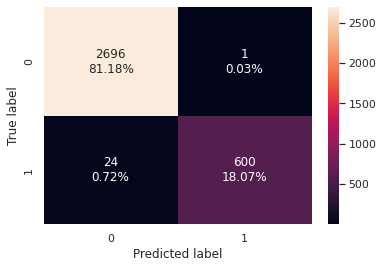

In [80]:
confusion_matrix_sklearn(bagging_classifier_basic, X_train, y_train)

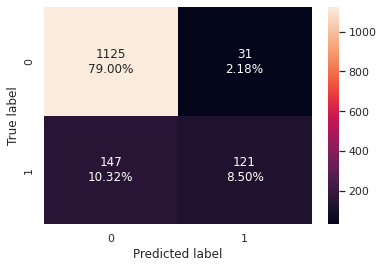

In [81]:
confusion_matrix_sklearn(bagging_classifier_basic, X_test, y_test)

**Observation - Bagging Classifier Basic** 
The model is overfitting with a recall value of 96 and 45 in the training and test sets respectively. 

Let us try building 2 more BaggingClassifiers - One using Logistic Regression and another using the default DecisionTree and hyperparameter tuning to see if we get any better metrics.


**Building a basic Bagging Classifier using the LogisticRegression algorithm.**

In [82]:
bagging_classifier_logistic=BaggingClassifier(base_estimator=LogisticRegression(class_weight={0:0.19,1:0.81},random_state=1),random_state=1)
bagging_classifier_logistic.fit(X_train,y_train)


BaggingClassifier(base_estimator=LogisticRegression(class_weight={0: 0.19,
                                                                  1: 0.81},
                                                    random_state=1),
                  random_state=1)

In [83]:
bagging_classifier_logistic_score=get_metrics_score(bagging_classifier_logistic)
add_score_model(bagging_classifier_logistic_score)

Accuracy on training set :  0.6889491117133394
Accuracy on test set :  0.7043539325842697
Recall on training set :  0.7131410256410257
Recall on test set :  0.6716417910447762
Precision on training set :  0.34257120862201695
Precision on test set :  0.3508771929824561
F1 on training set :  0.4628185127405097
F1 on test set :  0.4609475032010243


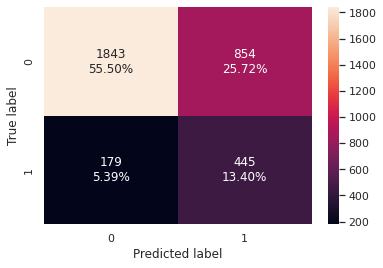

In [84]:
confusion_matrix_sklearn(bagging_classifier_logistic, X_train, y_train)

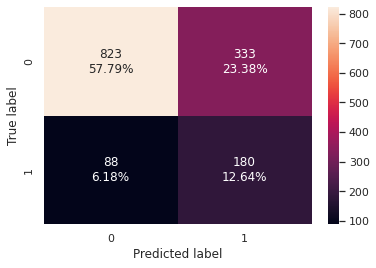

In [85]:
confusion_matrix_sklearn(bagging_classifier_logistic, X_test, y_test)

**Observation - Bagging Classifier built using LogisticRegression and class_weight configured**

The recall metrics have improved 71 on training set and 67 on the test set. However when it comes to the rest of the metrics the model seems to be slightly underfitting.

**Bagging Classifier Tuned**

In [86]:
# Choose the type of classifier. 
bagging_classifier_tuned = BaggingClassifier(DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_classifier_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_classifier_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_classifier_tuned.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        random_state=1),
                  max_features=1, max_samples=0.7, n_estimators=20,
                  random_state=1)

In [87]:
bagging_classifier_tuned_score=get_metrics_score(bagging_classifier_tuned)
add_score_model(bagging_classifier_tuned_score)

Accuracy on training set :  0.7621198434206564
Accuracy on test set :  0.738061797752809
Recall on training set :  0.6762820512820513
Recall on test set :  0.6044776119402985
Precision on training set :  0.4178217821782178
Precision on test set :  0.3776223776223776
F1 on training set :  0.5165238678090576
F1 on test set :  0.4648493543758967


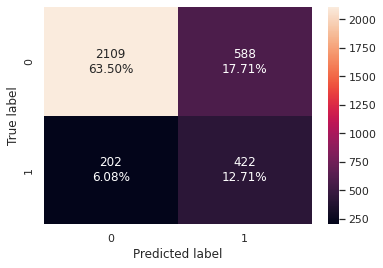

In [88]:
confusion_matrix_sklearn(bagging_classifier_tuned, X_train, y_train)

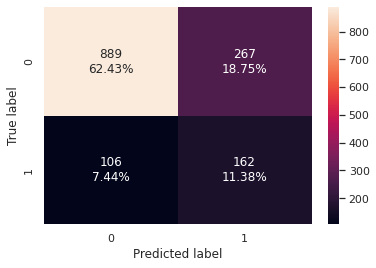

In [89]:
confusion_matrix_sklearn(bagging_classifier_tuned, X_test, y_test)

**Observation - Bagging Classifier Tuned**
The model is neither overfit nor underfit... However it is not yeilding us good metrics in order to be proposed as the best performing model. 

# Random Forest Classifier

**Let us start by building a basic Classifier with the class_weight configured to give more weightage to Class 1.**

In [90]:
randomforest_basic = RandomForestClassifier(class_weight={0: 0.19,1: 0.81},random_state=1)
#Fit the training data
randomforest_basic.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)

In [91]:
randomforest_basic_score=get_metrics_score(randomforest_basic)
add_score_model(randomforest_basic_score)

Accuracy on training set :  1.0
Accuracy on test set :  0.8764044943820225
Recall on training set :  1.0
Recall on test set :  0.4141791044776119
Precision on training set :  1.0
Precision on test set :  0.8538461538461538
F1 on training set :  1.0
F1 on test set :  0.5577889447236181


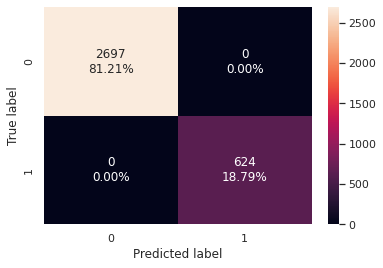

In [92]:
confusion_matrix_sklearn(randomforest_basic, X_train, y_train)

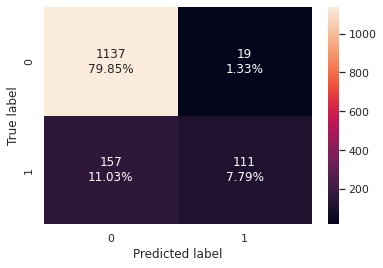

In [93]:
confusion_matrix_sklearn(randomforest_basic, X_test, y_test)

**Observation - Random Forest Basic**
The model is overfitting with a recall value of 100 in training set and 40 in the test set. Let us go ahead and fine tune the model to improve the metrics.


# Random Forest Tuned

In [94]:
# Choose the type of classifier. 
randomforest_tuned = RandomForestClassifier(class_weight={0:0.19,1:0.81},random_state=1)

parameters = {  
    'max_depth': list(np.arange(10,25,5)) + [None],
    'max_features': ['sqrt','log2',None],
    'min_samples_leaf': np.arange(1,15,5),
    'min_samples_split': np.arange(2, 20, 5),
    'n_estimators': np.arange(10,30,10)}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(randomforest_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
randomforest_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
randomforest_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=10,
                       max_features='sqrt', min_samples_leaf=11,
                       n_estimators=20, random_state=1)

In [95]:
randomforest_tuned_score=get_metrics_score(randomforest_tuned)
add_score_model(randomforest_tuned_score)

Accuracy on training set :  0.8651008732309545
Accuracy on test set :  0.8139044943820225
Recall on training set :  0.7756410256410257
Recall on test set :  0.5746268656716418
Precision on training set :  0.6111111111111112
Precision on test set :  0.5049180327868853
F1 on training set :  0.6836158192090397
F1 on test set :  0.5375218150087261


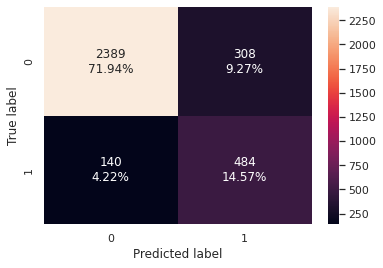

In [96]:
confusion_matrix_sklearn(randomforest_tuned, X_train, y_train)

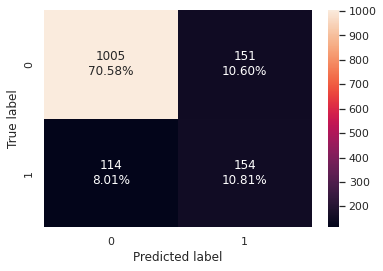

In [97]:
confusion_matrix_sklearn(randomforest_tuned, X_test, y_test)

**Feature Importances - Random Forest Tuned**

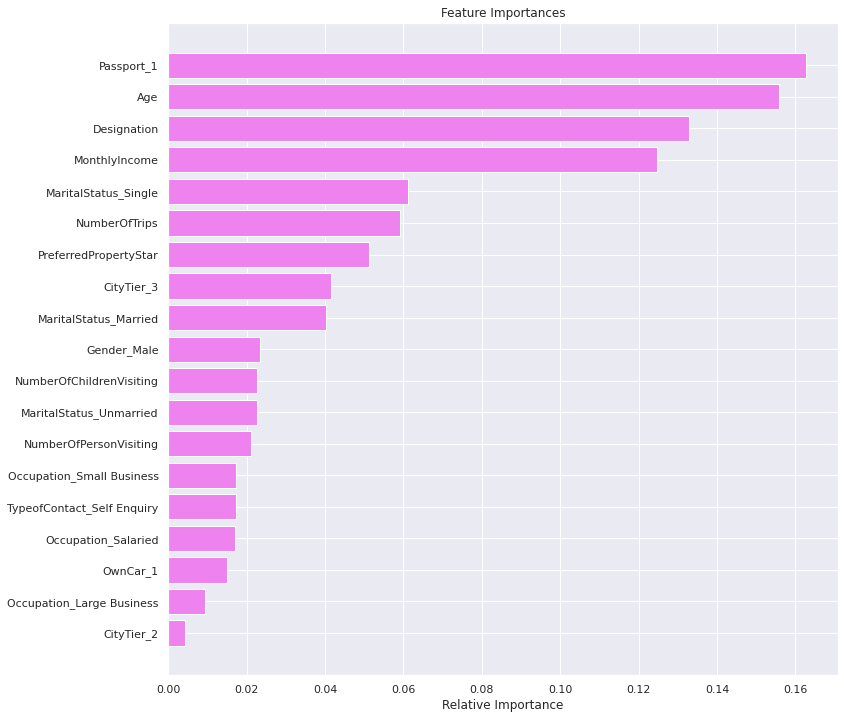

In [98]:
importances = randomforest_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observation - Random Forest Tuned**

Though this model gave us improved metrics on the training data, it is overfitting with significantly lower metrics on the test data. The model ranks Passport, Age and MonthlyIncome as the most influencial features.

**Decision Tree**

**Let us start by building a basic Tree with the class_weight configured to give more weightage to Class 1.**

In [99]:
decisiontree_basic = DecisionTreeClassifier(random_state=1,class_weight={0:0.19, 1:0.81})
#Let us fit the training data
decisiontree_basic.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)

In [100]:
decisiontree_basic_score=get_metrics_score(decisiontree_basic)
add_score_model(decisiontree_basic_score)

Accuracy on training set :  1.0
Accuracy on test set :  0.8672752808988764
Recall on training set :  1.0
Recall on test set :  0.6044776119402985
Precision on training set :  1.0
Precision on test set :  0.6612244897959184
F1 on training set :  1.0
F1 on test set :  0.631578947368421


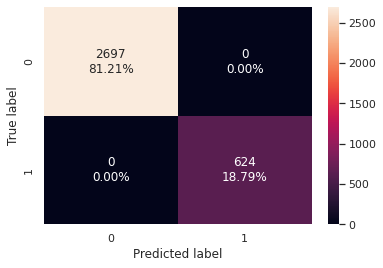

In [101]:
confusion_matrix_sklearn(decisiontree_basic, X_train, y_train)

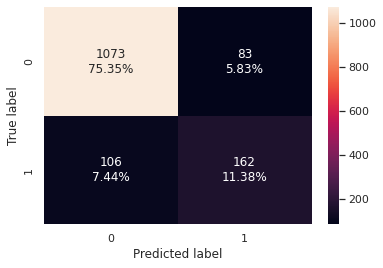

In [102]:
confusion_matrix_sklearn(decisiontree_basic, X_test, y_test)

**Observation - Decision Tree Basic**

Though the model is performing exceptionally well in the training dataset, it is grossly overfitting with significantly lower metrics in the test dataset. Let us fine tune the tree to improve the metrics and get more generalized results.

# Decision Tree Tuned 

**Decision Tree (Pre-pruning)**

Using GridSearch for Hyperparameter tuning of our tree model



In [103]:
#Choose the type of classifier. 
decisiontree_tuned = DecisionTreeClassifier(random_state=1, class_weight={0:0.19,1:0.81})

# Grid of parameters to choose from - 71 and 69 recall on training and test data respectively
parameters = {'max_depth': [1,4,7,15], 
             'min_samples_leaf': [2,3,5],
            'max_leaf_nodes' : [ 5,7,10,15]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(decisiontree_tuned, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
decisiontree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
decisiontree_tuned.fit(X_train, y_train)


DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=7,
                       max_leaf_nodes=15, min_samples_leaf=2, random_state=1)

In [104]:
decisiontree_tuned_score=get_metrics_score(decisiontree_tuned)
add_score_model(decisiontree_tuned_score)

Accuracy on training set :  0.7708521529659741
Accuracy on test set :  0.7443820224719101
Recall on training set :  0.7227564102564102
Recall on test set :  0.6417910447761194
Precision on training set :  0.4340712223291627
Precision on test set :  0.39090909090909093
F1 on training set :  0.5423932651834035
F1 on test set :  0.48587570621468923


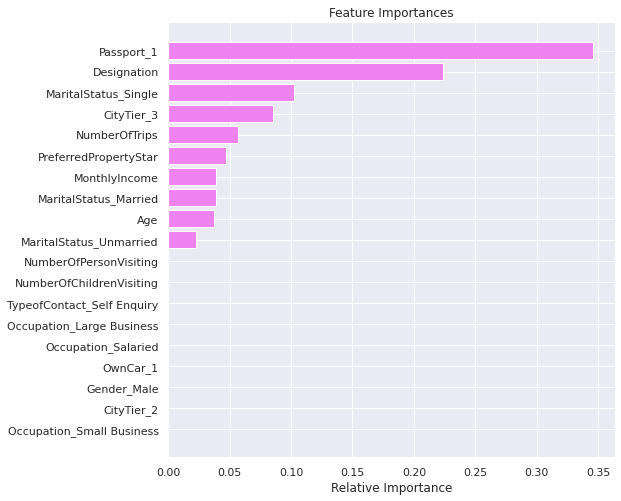

In [105]:
# importance of features in the tree building
feature_names = list(X_train.columns)
importances = decisiontree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Visualizing the Decision Tree**




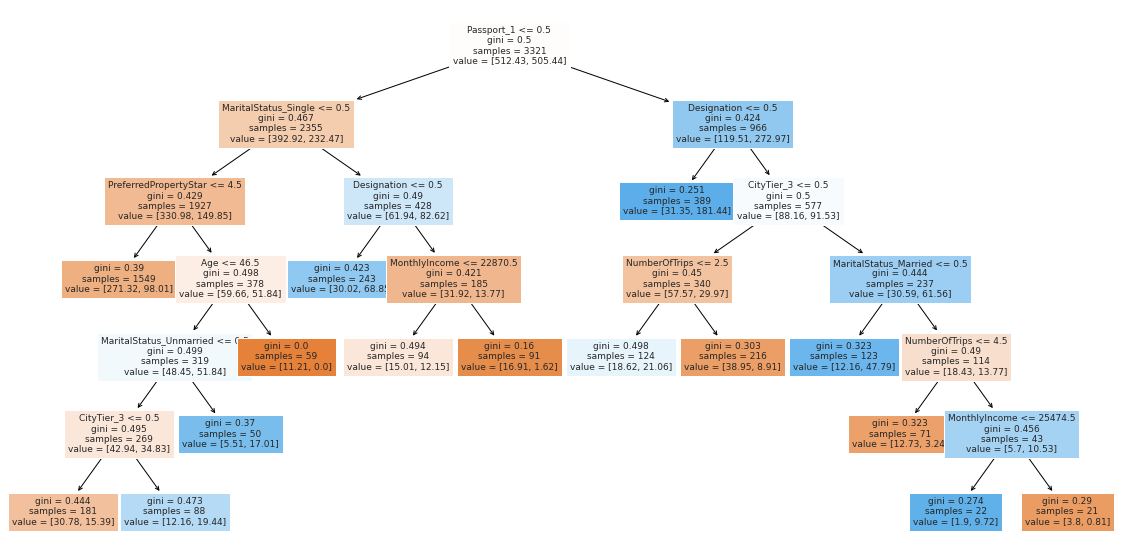

In [106]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    decisiontree_tuned,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

**Observation - Decision Tree Tuned**

The pruned tree is slightly overfitting. The recall metrics were 72 and 64 on the training and test sets respectively.

Passport, Designation and Marital Status are the features that are given the highest importance.




# Boosting Classifiers

# Adaptive Boosting Classifier

**Let us start by building a basic classifier**

In [107]:
abc_basic = AdaBoostClassifier(random_state=1)
#Let us fit the training data
abc_basic.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [108]:
abc_basic_score=get_metrics_score(abc_basic)
add_score_model(abc_basic_score)

Accuracy on training set :  0.8488407106293285
Accuracy on test set :  0.8307584269662921
Recall on training set :  0.30448717948717946
Recall on test set :  0.22014925373134328
Precision on training set :  0.7364341085271318
Precision on test set :  0.6483516483516484
F1 on training set :  0.4308390022675736
F1 on test set :  0.3286908077994429


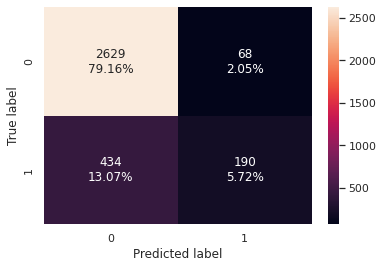

In [109]:
confusion_matrix_sklearn(abc_basic, X_train, y_train)

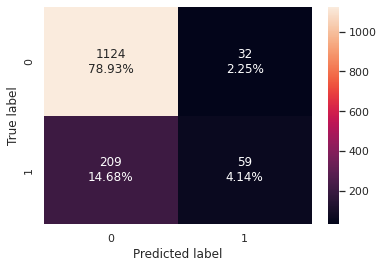

In [110]:
confusion_matrix_sklearn(abc_basic, X_test, y_test)

**Observation - Adaptive Boosting Basic**

The basic model yeilds very low recall rates - 30 and 22 on training and test datasets respectively. Let us go ahead and tune the model to improve the metrics.


# Adaptive Boosting Tuned

In [111]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from 
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2)],
    "n_estimators": np.arange(10,50,10),
    "learning_rate":np.arange(0.1,1,0.1)
}


# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.7000000000000001, n_estimators=40,
                   random_state=1)

In [112]:
abc_tuned_score=get_metrics_score(abc_tuned)
add_score_model(abc_tuned_score)

Accuracy on training set :  0.8786510087323095
Accuracy on test set :  0.8356741573033708
Recall on training set :  0.4807692307692308
Recall on test set :  0.30597014925373134
Precision on training set :  0.7915567282321899
Precision on test set :  0.6307692307692307
F1 on training set :  0.5982053838484547
F1 on test set :  0.4120603015075377


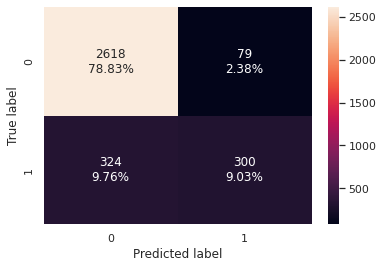

In [113]:
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

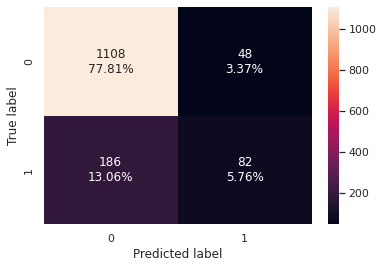

In [114]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

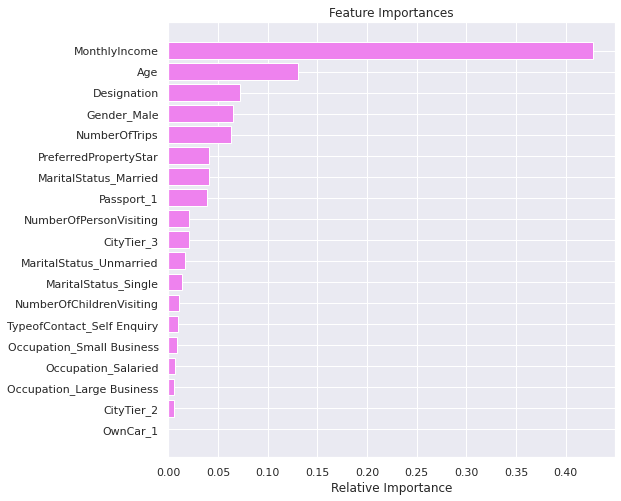

In [115]:
# importance of features
feature_names = list(X_train.columns)
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation - Adaptive Boosting Tuned**

Though the recall metrics showed improvement with tuning, the model is still overfitting.

The top 3 features in the order of importance are - MonthlyIncome, Age and Designation.

# Gradient Boosting

**Let us start out by building a basic classifier.**

In [116]:
gbc_basic = GradientBoostingClassifier(random_state=1)
#Let us fit the training data
gbc_basic.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [117]:
gbc_basic_score=get_metrics_score(gbc_basic)
add_score_model(gbc_basic_score)

Accuracy on training set :  0.8855766335441132
Accuracy on test set :  0.8504213483146067
Recall on training set :  0.46314102564102566
Recall on test set :  0.3246268656716418
Precision on training set :  0.8652694610778443
Precision on test set :  0.7310924369747899
F1 on training set :  0.6033402922755742
F1 on test set :  0.4496124031007751


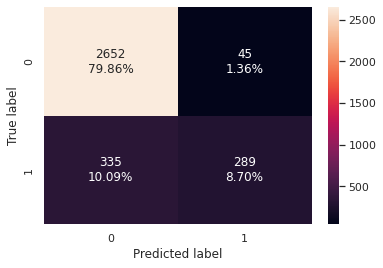

In [118]:
confusion_matrix_sklearn(gbc_basic, X_train, y_train)

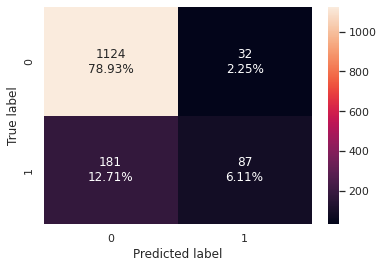

In [119]:
confusion_matrix_sklearn(gbc_basic, X_test, y_test)

**Observation - GradientBoosting Basic**

The model is overfitting. Let us go ahead and tune it to get more generalized results.

# Gradient Boosting Tuned

In [120]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=250, random_state=1,
                           subsample=0.9)

In [121]:
gbc_tuned_score=get_metrics_score(gbc_tuned)
add_score_model(gbc_tuned_score)

Accuracy on training set :  0.9138813610358326
Accuracy on test set :  0.8658707865168539
Recall on training set :  0.6025641025641025
Recall on test set :  0.39925373134328357
Precision on training set :  0.9082125603864735
Precision on test set :  0.781021897810219
F1 on training set :  0.7244701348747591
F1 on test set :  0.5283950617283951


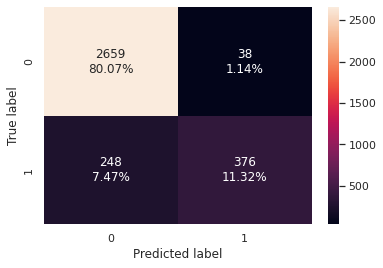

In [122]:
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

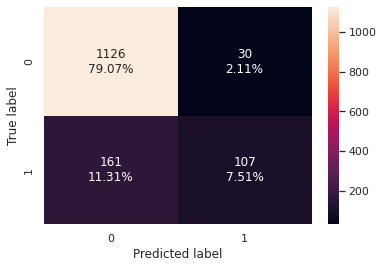

In [123]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

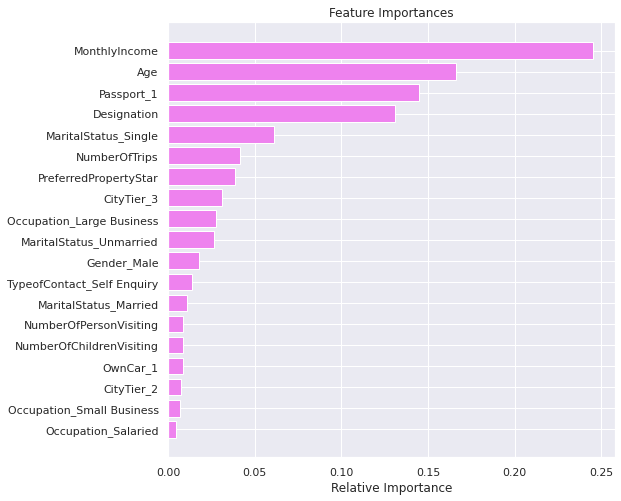

In [124]:
# importance of features 
feature_names = list(X_train.columns)
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation - Gradient Boosting Tuned**
The tuned version yeilded improved metrics in Accuracy, Precision and F1 though there is clearly overfitting of data. The recall metrics remain low at 60 and 40 for training and testing respectively.

The top 3 features in order of importance are: MonthlyIncome, Age and Passport.

# Extreme Gradient Boosting

**Let us start out by building a basic classifier**

In [125]:
xgb_basic = XGBClassifier(random_state=1,eval_metric='logloss')
xgb_basic.fit(X_train,y_train)

XGBClassifier(eval_metric='logloss', random_state=1)

In [126]:
xgb_basic_score=get_metrics_score(xgb_basic)
add_score_model(xgb_basic_score)

Accuracy on training set :  0.8777476663655526
Accuracy on test set :  0.8490168539325843
Recall on training set :  0.4230769230769231
Recall on test set :  0.29850746268656714
Precision on training set :  0.8516129032258064
Precision on test set :  0.7476635514018691
F1 on training set :  0.5653104925053533
F1 on test set :  0.4266666666666666


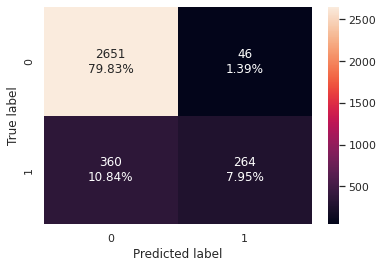

In [127]:
confusion_matrix_sklearn(xgb_basic, X_train, y_train)

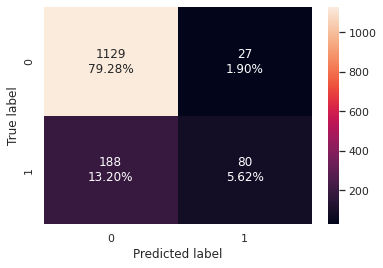

In [128]:
confusion_matrix_sklearn(xgb_basic, X_test, y_test)

**Observation - Extreme Gradient Boosting**

The model returned good metrics for Accuracy and Precision. However the recall metrics were relatively low at 42 and 30 in training and testing respectively. Let us go ahead and fine tune the model to improve the recall metrics while keeping an eye on the F1 score.

# Extreme Gradient Boosting Tuned

In [129]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
   "n_estimators": [30,40,50],
    "scale_pos_weight":[4,5,6],
    "colsample_bylevel":[0.4,0.5,0.7,1],
    "learning_rate":[0.001,0.005,0.01]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(colsample_bylevel=0.4, eval_metric='logloss', learning_rate=0.001,
              n_estimators=30, random_state=1, scale_pos_weight=6)

In [130]:
xgb_tuned_score=get_metrics_score(xgb_tuned)
add_score_model(xgb_tuned_score)

Accuracy on training set :  0.6476964769647696
Accuracy on test set :  0.6460674157303371
Recall on training set :  0.8076923076923077
Recall on test set :  0.7611940298507462
Precision on training set :  0.32432432432432434
Precision on test set :  0.3167701863354037
F1 on training set :  0.4628099173553719
F1 on test set :  0.4473684210526315


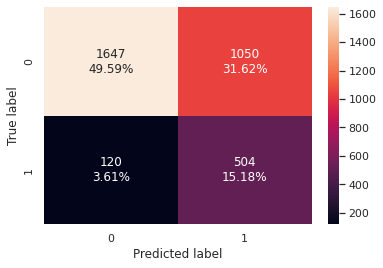

In [131]:
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

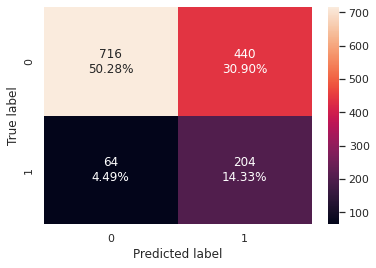

In [132]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

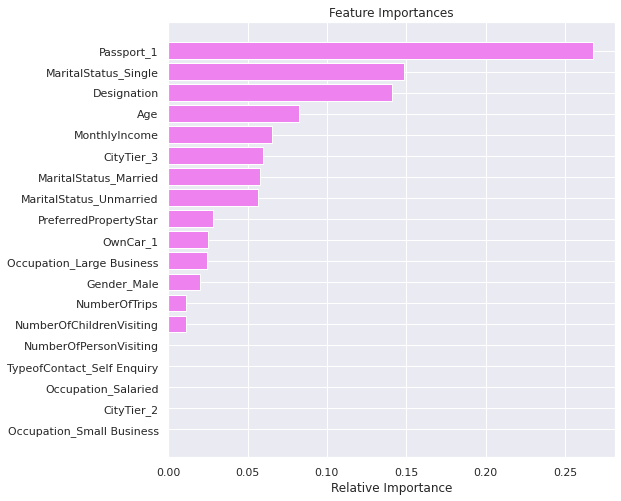

In [133]:
# importance of features
feature_names = list(X_train.columns)
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation - Extreme Gradient Boosting Tuned**

**By far, this model has given us the best recall metrics. Recall metrics are 80 and 76 for training and test data respectively.**

The model did not yeild great metrics for Precision, however we got mediocre F1 scores - 46 and 44 on training and test datasets respectively.

The top 3 features in the order of importance are Passport, Designation and MaritalStatus.


# End of Boosting Algorithms

# Stacking

Let us start out by building a Stacking Algorithm using the basic models already built.

In [134]:
estimators = [('Bagging Classifier',bagging_classifier_basic), ('Decision Tree', decisiontree_basic)]

final_estimator = randomforest_basic

stacking_classifier_basic= StackingClassifier(estimators=estimators,final_estimator=final_estimator)
#Let us fit the training data
stacking_classifier_basic.fit(X_train,y_train)

StackingClassifier(estimators=[('Bagging Classifier',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                                                      1: 0.81},
                                                                                        random_state=1),
                                                  random_state=1)),
                               ('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.19,
                                                                     1: 0.81},
                                                       random_state=1))],
                   final_estimator=RandomForestClassifier(class_weight={0: 0.19,
                                                                        1: 0.81},
                                                          random_state=1))

In [135]:
stacking_classifier_basic_score=get_metrics_score(stacking_classifier_basic)
add_score_model(stacking_classifier_basic_score)

Accuracy on training set :  0.976513098464318
Accuracy on test set :  0.839185393258427
Recall on training set :  1.0
Recall on test set :  0.746268656716418
Precision on training set :  0.8888888888888888
Precision on test set :  0.554016620498615
F1 on training set :  0.9411764705882353
F1 on test set :  0.6359300476947537


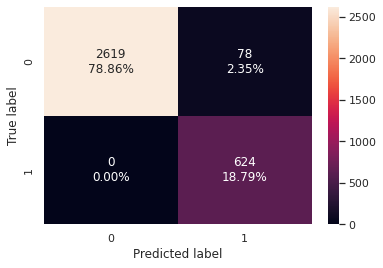

In [136]:
confusion_matrix_sklearn(stacking_classifier_basic, X_train, y_train)

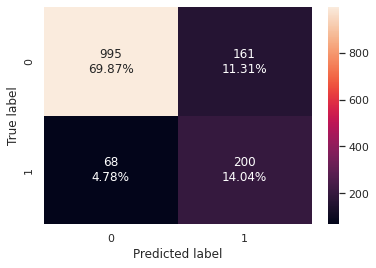

In [137]:
confusion_matrix_sklearn(stacking_classifier_basic, X_test, y_test)

**Observation - Stacking algorithm built using basic (non-tuned) models**

Though all the 4 metrics are exceptionally good on the training data, the corresponding metrics on the test data are significantly low indicating overfitting. Let us tune the model to see if we can get generalized results.

# Stacking - Using Tuned models

In [138]:
estimators = [('Random Forest',randomforest_tuned), ('Bagging Classifier',bagging_classifier_tuned), ('Decision Tree',decisiontree_tuned)]

final_estimator = xgb_tuned

stacking_classifier_tuned= StackingClassifier(estimators=estimators,final_estimator=final_estimator)
#Let us fit the training data
stacking_classifier_tuned.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.19,
                                                                     1: 0.81},
                                                       max_depth=10,
                                                       max_features='sqrt',
                                                       min_samples_leaf=11,
                                                       n_estimators=20,
                                                       random_state=1)),
                               ('Bagging Classifier',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                                                      1: 0.81},
                                                                                        random_state=1),
                                              

In [139]:
stacking_classifier_tuned_score=get_metrics_score(stacking_classifier_tuned)
add_score_model(stacking_classifier_tuned_score)

Accuracy on training set :  0.8115025594700391
Accuracy on test set :  0.7661516853932584
Recall on training set :  0.8317307692307693
Recall on test set :  0.667910447761194
Precision on training set :  0.49903846153846154
Precision on test set :  0.4231678486997636
F1 on training set :  0.6237980769230769
F1 on test set :  0.5180897250361794


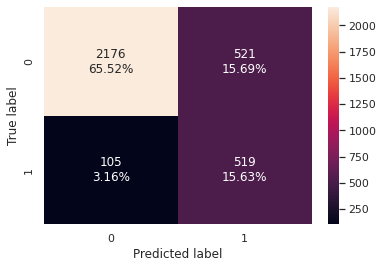

In [140]:
confusion_matrix_sklearn(stacking_classifier_tuned, X_train, y_train)

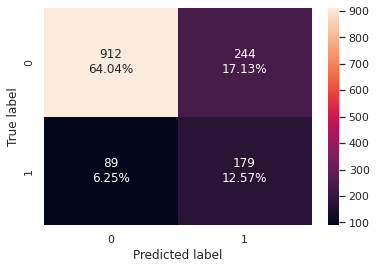

In [141]:
confusion_matrix_sklearn(stacking_classifier_tuned, X_test, y_test)

**Observation - Stacking Tuned**

The recall metric between training and testing is about 10 percent indicating overfitting.

# Model Metric Matrix

In [142]:
comparison_frame = pd.DataFrame({'Model':['Bagging Classifier Default',
                                          'Bagging Classifier Logistic',
                                          'Bagging Classifier Tuned',
                                          'Random Forest',
                                          'Random Forest Tuned',
                                          'Decision Tree',
                                          'Decision Tree Tuned',
                                          'Adaptive Boosting',
                                          'Adaptive Boosting Tuned',
                                          'Gradient Boosting',
                                          'Gradient Boosting Tuned',
                                          'Extreme Gradient Boosting', 
                                          'Extreme Gradient Boosting Tuned',
                                          'Stacking Classifier (bagging + decisiontree -> rf)',
                                          'Stacking Classifier Tuned (rf_tuned + bagging_tuned + decisiont_tuned -> xgb_tuned)'],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1':f1_train,
                                          'Test_F1':f1_test  }) 


for col in comparison_frame.select_dtypes(include='float').columns.to_list():
    comparison_frame[col] = (round(comparison_frame[col] * 100, 0)).astype(int)
    
#Sorting models in decreasing order of test recall metric
comparison_frame.sort_values(by='Test_Recall',ascending=False)


,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
12,Extreme Gradient Boosting Tuned,65,65,81,76,32,32,46,45
13,Stacking Classifier (bagging + decisiontree ->...,98,84,100,75,89,55,94,64
1,Bagging Classifier Logistic,69,70,71,67,34,35,46,46
14,Stacking Classifier Tuned (rf_tuned + bagging_...,81,77,83,67,50,42,62,52
6,Decision Tree Tuned,77,74,72,64,43,39,54,49
2,Bagging Classifier Tuned,76,74,68,60,42,38,52,46
5,Decision Tree,100,87,100,60,100,66,100,63
4,Random Forest Tuned,87,81,78,57,61,50,68,54
0,Bagging Classifier Default,99,88,96,45,100,80,98,58
3,Random Forest,100,88,100,41,100,85,100,56


**Conclusion drawn from Model Metric Matrix**

**The Tuned Extreme Gradient Boosting Model gave us the best recall metric - 81 on training data and 76 on test data. The model however gave us sub-optimal F1 scores of 46 and 45 on training and test data respectively.** 

**Conclusions drawn on Feature Importance**

Passport, Designation, Marital Status, MonthlyIncome and Age seem to be most important features.

The features,number of children visiting and owning a car seemed to be insignificant.

# Conclusion

We have been able to build a predictive model, that the company can:

a) Deploy to identify customers who will be interested in purchasing the Travel package.

b) Rely on finding the key factors that will have an impact on a customer purchasing a package.

The top 5 features that have an impact on the Purchase are Passport,Desgination, Martialstatus, MonthlyIncome and Age.

Basic and Deluxe are the most popular packages. 


# Actionable Insights & Recommendations

Executives should be the primary target customers for the company. People in higher age groups also seem to opt for the high end luxury packages. Campaigning/Marketing should be cautious to make sure the wellness package does not get mistaken for a medical package. The campaigning should clearly state that the wellness packages aim to turn travel into an opportunity to maintain and improve the holistic health. Executive check-ups and DNA tests could be bundled into the packages.

Many large companies offer wellness programs to the employees to promote healthy lifestyle, to reduce stress and to enhance well-being. Our company, 'Visit With Us' could work with these corporates in an effort to promote our new package. We could offer the new package at a discounted rate to the corporates and request that they offer these discounted rates as rewards to employers who show a continued dedication to the wellness programs. 

Single & unmarried customers with passports living in Tier 3 Cities owning large businesses also have higher chances of purchasing the new package. Though we have a lot of married folks in our customer base, they dont seem to purchase the packages as compared to the single & unmarried customers. It could be that married couples with children might feel it is hectic and usafe to travel with children. Advertising availability of hotels or resorts with child care facilities might help in getting more married couples to purchase the package. Campaigning could also focus on highligting how traveling and exploring ignites the brain of a child.

Customers with passports have better chances of purchasing the package. Offering free Passport application and renewal services might entice the customers to obtain a passport. Storing the customer's passport expiry date could come handy if we were to send reminders to the customers to start the renewal process. If  the new package includes international destinations, providing a seemless visa aquisition process would be a major factor in getting the customers to purchase the package.


The data collection process can be enhanced to capture additional information in regards to customer satisfaction post tour and data to correlate the product pitched to the product actually purchased. Keeping a record of customer's birthdays and wedding anniversaries might come handy if we were to reach out to the customers few months before these dates and enquire about their plans for the fast approaching big day.

The WELLNESS TOURISM PACKAGE should be curated considering the features of existing packages that customers have purchased. If the new package consists of multiple types, make sure to pitch the appropriate type (Basic vs Deluxe vs King) based on the customer's Designation, Income and Prefered Property Type. Also have the sales pitch tailored by the package type. Keep the pitch short when dealing with customers in the 18-25 age group as their attention span doesnt lost very long. Also keep the pitch to a high level and short interval when the customers hold Executive positions.  

Based on EDA, the marketing/sales people should also consider:

  1. Having a higher duration of pitch by salesman to the customer.

  2. Getting a Pitch Satisfaction Score of 3 - 5.

  3. Having multiple follow ups with the customers. 

The above three factors seem to improve the chance of a purchase.

